# **TESTING DATA 1 BULAN**

## **Import Library & Config**

### Import n Install Library

In [ ]:
# SECTION 1: Import + Config
!pip -q install xgboost

In [ ]:
import pandas as pd
import numpy as np

from dataclasses import dataclass
from typing import List, Tuple, Optional

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Skripsi Vito/Dataset/Dataset Dummy/dataset_sintetis_logistik_bandung_90hari.csv")

In [ ]:
df

,tanggal,hari_dalam_minggu,minggu_ke,id_trip,id_armada,jenis_armada,kapasitas_kg,status_armada,base_keberangkatan,wilayah_tujuan,...,shift_driver,plat_nomor,vendor_bbm,metode_pembayaran_tol,kode_maintenance,catatan_ops,sumber_order,channel_order,rating_customer,komplain_flag
0,2025-01-01,Jumat,1,TRIP-2025-01-01-A3-01,A3,truk_kecil,2360,aktif,Bandung,Semarang,...,siang,D 2899 AA,Shell,cash,NaN,hujan deras,marketplace,web,3.0,0
1,2025-01-01,Jumat,1,TRIP-2025-01-01-A4-02,A4,truk_kecil,2794,aktif,Bandung,Jakarta,...,pagi,D 9226 AG,Pertamina,cash,NaN,NaN,corporate,web,3.0,0
2,2025-01-01,Jumat,1,TRIP-2025-01-01-A5-03,A5,truk_kecil,2630,aktif,Bandung,Semarang,...,pagi,D 1878 AF,Pertamina,e-toll,NaN,NaN,corporate,api,4.0,0
3,2025-01-01,Jumat,1,TRIP-2025-01-01-A6-04,A6,truk_kecil,2595,aktif,Bandung,Surabaya,...,pagi,D 7184 AE,Shell,cash,NaN,kecelakaan di tol,marketplace,whatsapp,5.0,0
4,2025-01-01,Jumat,1,TRIP-2025-01-01-A7-05,A7,truk_besar,9772,aktif,Bandung,Surabaya,...,malam,D 1206 AC,Shell,e-toll,NaN,NaN,corporate,whatsapp,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,2025-03-31,Rabu,13,TRIP-2025-03-31-A6-03,A6,truk_kecil,2595,aktif,Bandung,Jakarta,...,pagi,D 8518 AG,Pertamina,cash,NaN,kecelakaan di tol,corporate,whatsapp,1.0,0
649,2025-03-31,Rabu,13,TRIP-2025-03-31-A3-04,A3,truk_kecil,2360,aktif,Bandung,Denpasar,...,pagi,D 5686 AA,Pertamina,e-toll,NaN,NaN,corporate,api,5.0,0
650,2025-03-31,Rabu,13,TRIP-2025-03-31-A8-05,A8,truk_besar,9092,aktif,Bandung,Yogyakarta,...,malam,D 6581 AC,Pertamina,cash,NaN,macet parah,marketplace,web,4.0,0
651,2025-03-31,Rabu,13,TRIP-2025-03-31-A9-06,A9,truk_besar,11734,aktif,Bandung,Yogyakarta,...,malam,D 4555 AA,Pertamina,e-toll,NaN,kecelakaan di tol,corporate,web,2.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   tanggal                           653 non-null    object 
 1   hari_dalam_minggu                 653 non-null    object 
 2   minggu_ke                         653 non-null    int64  
 3   id_trip                           653 non-null    object 
 4   id_armada                         653 non-null    object 
 5   jenis_armada                      653 non-null    object 
 6   kapasitas_kg                      653 non-null    int64  
 7   status_armada                     653 non-null    object 
 8   base_keberangkatan                653 non-null    object 
 9   wilayah_tujuan                    653 non-null    object 
 10  jarak_km_dari_bandung             653 non-null    float64
 11  jenis_rute                        653 non-null    object 
 12  jumlah_p

In [ ]:
df.columns

Index(['tanggal', 'hari_dalam_minggu', 'minggu_ke', 'id_trip', 'id_armada',
       'jenis_armada', 'kapasitas_kg', 'status_armada', 'base_keberangkatan',
       'wilayah_tujuan', 'jarak_km_dari_bandung', 'jenis_rute',
       'jumlah_pesanan_actual', 'total_muatan_kg_actual', 'jumlah_drop_point',
       'jenis_muatan', 'service_level', 'kondisi_cuaca',
       'tingkat_kepadatan_lalu_lintas', 'jam_berangkat', 'hari_libur_flag',
       'estimasi_waktu_tempuh_jam_actual', 'biaya_operasional_actual',
       'status_pengiriman', 'keterlambatan_menit', 'batas_waktu_sla_jam',
       'penalty_keterlambatan', 'biaya_tol', 'biaya_bbm', 'biaya_driver',
       'biaya_lain_lain', 'nama_driver', 'id_driver', 'shift_driver',
       'plat_nomor', 'vendor_bbm', 'metode_pembayaran_tol', 'kode_maintenance',
       'catatan_ops', 'sumber_order', 'channel_order', 'rating_customer',
       'komplain_flag'],
      dtype='object')

### Config

In [ ]:
@dataclass
class Config:
    path: str
    date_col: str = "tanggal"
    target_col: str = "jumlah_pesanan_actual"
    trip_id_col: str = "id_trip"
    holiday_col: str = "hari_libur_flag"
    traffic_col: str = "tingkat_kepadatan_lalu_lintas"
    dist_col: str = "jarak_km_dari_bandung"

    train_days: int = 30
    test_days: int = 30

CFG = Config(
    path="/content/drive/MyDrive/Skripsi Vito/Dataset/Dataset Dummy/dataset_sintetis_logistik_bandung_90hari.csv"
)

def require_cols(df: pd.DataFrame, cols: List[str], section_name: str):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise ValueError(
            f"[{section_name}] Missing columns: {missing}\n"
            f"Available columns: {list(df.columns)}"
        )

## **Load Data + Validasi Kolom**

In [ ]:
def load_data(cfg: Config) -> pd.DataFrame:
    df = pd.read_csv(cfg.path)
    require_cols(df, [cfg.date_col, cfg.target_col], "LOAD")

    df[cfg.date_col] = pd.to_datetime(df[cfg.date_col], errors="coerce")
    if df[cfg.date_col].isna().any():
        bad = df[df[cfg.date_col].isna()].head(5)
        raise ValueError(f"[LOAD] Found invalid dates in {cfg.date_col}. Sample:\n{bad}")

    df = df.sort_values(cfg.date_col).reset_index(drop=True)
    return df

df = load_data(CFG)
df.head(), df.shape


(     tanggal hari_dalam_minggu  minggu_ke                id_trip id_armada  \
 0 2025-01-01             Jumat          1  TRIP-2025-01-01-A3-01        A3   
 1 2025-01-01             Jumat          1  TRIP-2025-01-01-A4-02        A4   
 2 2025-01-01             Jumat          1  TRIP-2025-01-01-A5-03        A5   
 3 2025-01-01             Jumat          1  TRIP-2025-01-01-A6-04        A6   
 4 2025-01-01             Jumat          1  TRIP-2025-01-01-A7-05        A7   
 
   jenis_armada  kapasitas_kg status_armada base_keberangkatan wilayah_tujuan  \
 0   truk_kecil          2360         aktif            Bandung       Semarang   
 1   truk_kecil          2794         aktif            Bandung        Jakarta   
 2   truk_kecil          2630         aktif            Bandung       Semarang   
 3   truk_kecil          2595         aktif            Bandung       Surabaya   
 4   truk_besar          9772         aktif            Bandung       Surabaya   
 
    ...  shift_driver plat_nomor  ve

## **Agregasi Harian (Daily Demand)**

In [ ]:
# SECTION 3 (FIXED): Daily Aggregation - robust for categorical traffic

def build_daily(df: pd.DataFrame, cfg: Config) -> pd.DataFrame:
    df = df.copy()

    # kolom opsional (kalau ga ada, kita isi default)
    optional_cols = [cfg.holiday_col, cfg.traffic_col, cfg.dist_col, cfg.trip_id_col]
    for c in optional_cols:
        if c not in df.columns:
            df[c] = np.nan

    # --- FIX 1: traffic bisa berupa string kategori (rendah/sedang/tinggi)
    # mapping umum (silakan adjust kalau dataset lu punya kelas lain)
    traffic_map = {
        "rendah": 1,
        "sedang": 2,
        "tinggi": 3,
        "sangat tinggi": 4,
        "low": 1,
        "medium": 2,
        "high": 3
    }

    if cfg.traffic_col in df.columns:
        if df[cfg.traffic_col].dtype == "object":
            # normalize text
            df[cfg.traffic_col] = (
                df[cfg.traffic_col]
                .astype(str)
                .str.strip()
                .str.lower()
                .replace({"nan": np.nan})
            )
            # map ke numeric
            df[cfg.traffic_col] = df[cfg.traffic_col].map(traffic_map)

        # pastikan numeric
        df[cfg.traffic_col] = pd.to_numeric(df[cfg.traffic_col], errors="coerce")

    # --- FIX 2: distance pastikan numeric
    if cfg.dist_col in df.columns:
        df[cfg.dist_col] = pd.to_numeric(df[cfg.dist_col], errors="coerce")

    # --- holiday pastikan 0/1
    if cfg.holiday_col in df.columns:
        df[cfg.holiday_col] = pd.to_numeric(df[cfg.holiday_col], errors="coerce")

    # --- agregasi harian
    daily = (
        df.groupby(cfg.date_col, as_index=False)
          .agg(
              demand=(cfg.target_col, "sum"),
              holiday=(cfg.holiday_col, "max"),
              avg_traffic=(cfg.traffic_col, "mean"),
              avg_distance=(cfg.dist_col, "mean"),
              trips=(cfg.trip_id_col, "count"),
          )
    ).sort_values(cfg.date_col).reset_index(drop=True)

    # handle missing
    daily["holiday"] = daily["holiday"].fillna(0)

    for col in ["avg_traffic", "avg_distance"]:
        if daily[col].isna().all():
            daily[col] = 0
        else:
            daily[col] = daily[col].fillna(daily[col].median())

    return daily

daily = build_daily(df, CFG)
daily.head(), daily.shape


(     tanggal  demand  holiday  avg_traffic  avg_distance  trips
 0 2025-01-01     239        0     2.000000    379.066076      8
 1 2025-01-02     254        0     2.000000    685.415466      8
 2 2025-01-03     217        0     1.714286    414.383145      7
 3 2025-01-04     153        0     2.166667    503.946314      6
 4 2025-01-05     189        0     2.375000    789.699341      8,
 (90, 6))

In [ ]:
print(daily.dtypes)
print(daily[["avg_traffic","avg_distance"]].describe())


tanggal         datetime64[ns]
demand                   int64
holiday                  int64
avg_traffic            float64
avg_distance           float64
trips                    int64
dtype: object
       avg_traffic  avg_distance
count    90.000000     90.000000
mean      1.965983    535.441089
std       0.269902    136.675400
min       1.375000    182.214920
25%       1.756944    416.315147
50%       2.000000    528.329077
75%       2.142857    639.003435
max       2.625000    846.195006


## Feature Engineering (Lag/Rolling/Calendar)

In [ ]:
# SECTION 4: Feature Engineering
def make_features(daily_df: pd.DataFrame, cfg: Config) -> pd.DataFrame:
    d = daily_df.copy()
    d.rename(columns={cfg.date_col: "tanggal"}, inplace=True)

    d["dow"] = d["tanggal"].dt.dayofweek
    d["dom"] = d["tanggal"].dt.day
    d["weekofyear"] = d["tanggal"].dt.isocalendar().week.astype(int)
    d["month"] = d["tanggal"].dt.month
    d["is_weekend"] = (d["dow"] >= 5).astype(int)

    for lag in [1, 2, 3, 7, 14]:
        d[f"lag_{lag}"] = d["demand"].shift(lag)

    d["roll_mean_7"]  = d["demand"].shift(1).rolling(7).mean()
    d["roll_mean_14"] = d["demand"].shift(1).rolling(14).mean()
    d["roll_std_7"]   = d["demand"].shift(1).rolling(7).std()

    # drop NaN akibat lag/rolling
    before = len(d)
    d = d.dropna().reset_index(drop=True)
    after = len(d)
    if after == 0:
        raise ValueError(
            f"[FE] After dropping NaN, dataset empty. "
            f"Need more historical days for lag/rolling. Before={before}, After={after}"
        )
    return d

feat = make_features(daily, CFG)
feat.head(), feat.shape


(     tanggal  demand  holiday  avg_traffic  avg_distance  trips  dow  dom  \
 0 2025-01-15     243        0     2.625000    457.535132      8    2   15   
 1 2025-01-16     311        0     1.375000    391.297046      8    3   16   
 2 2025-01-17     220        0     2.142857    556.654051      7    4   17   
 3 2025-01-18     211        0     2.000000    615.121221      8    5   18   
 4 2025-01-19     186        0     1.857143    542.764967      7    6   19   
 
    weekofyear  month  is_weekend  lag_1  lag_2  lag_3  lag_7  lag_14  \
 0           3      1           0  236.0  205.0  292.0  229.0   239.0   
 1           3      1           0  243.0  236.0  205.0  138.0   254.0   
 2           3      1           0  311.0  243.0  236.0  170.0   217.0   
 3           3      1           1  220.0  311.0  243.0  222.0   153.0   
 4           3      1           1  211.0  220.0  311.0  292.0   189.0   
 
    roll_mean_7  roll_mean_14  roll_std_7  
 0   213.142857    214.428571   49.404550  
 1

## Split Train 1 Bulan vs Test Bulan Berikutnya

In [ ]:
# SECTION 5: Time Split
def time_split(feat_df: pd.DataFrame, cfg: Config) -> Tuple[pd.DataFrame, pd.DataFrame]:
    start = feat_df["tanggal"].min()
    train_end = start + pd.Timedelta(days=cfg.train_days)
    test_end = train_end + pd.Timedelta(days=cfg.test_days)

    train = feat_df[(feat_df["tanggal"] >= start) & (feat_df["tanggal"] < train_end)].copy()
    test  = feat_df[(feat_df["tanggal"] >= train_end) & (feat_df["tanggal"] < test_end)].copy()

    if len(train) < 10:
        raise ValueError(f"[SPLIT] Train too small: {len(train)} rows. Increase train_days or data length.")
    if len(test) < 5:
        raise ValueError(f"[SPLIT] Test too small: {len(test)} rows. Increase test_days or data length.")

    return train, test

train, test = time_split(feat, CFG)
train.shape, test.shape, train[["tanggal","demand"]].head(), test[["tanggal","demand"]].head()


((30, 19),
 (30, 19),
      tanggal  demand
 0 2025-01-15     243
 1 2025-01-16     311
 2 2025-01-17     220
 3 2025-01-18     211
 4 2025-01-19     186,
       tanggal  demand
 30 2025-02-14     150
 31 2025-02-15     206
 32 2025-02-16     140
 33 2025-02-17     234
 34 2025-02-18     179)

## Train Model + Predict

In [ ]:
# SECTION 6: Train + Predict
def train_xgb(train_df: pd.DataFrame, target: str = "demand") -> Tuple[XGBRegressor, List[str]]:
    drop_cols = ["tanggal", target]
    X_train = train_df.drop(columns=drop_cols)
    y_train = train_df[target]

    feature_cols = list(X_train.columns)

    model = XGBRegressor(
        n_estimators=800,
        learning_rate=0.03,
        max_depth=5,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model, feature_cols

def predict(model: XGBRegressor, test_df: pd.DataFrame, feature_cols: List[str], target: str="demand") -> np.ndarray:
    X_test = test_df[feature_cols]
    return model.predict(X_test)

model, feature_cols = train_xgb(train)
pred = predict(model, test, feature_cols)
pred[:5], len(pred)


(array([178.61461, 186.88928, 186.06747, 212.39093, 194.24203],
       dtype=float32),
 30)

## Evaluate

In [ ]:
# SECTION 7: Evaluate
def evaluate(y_true: np.ndarray, y_pred: np.ndarray) -> dict:
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred)) # Fixed: removed squared=False
    mape = (np.abs((y_true - y_pred) / np.maximum(y_true, 1))).mean() * 100
    return {"MAE": mae, "RMSE": rmse, "MAPE_%": mape}

y_test = test["demand"].values
metrics_xgb = evaluate(y_test, pred)

# baseline naive: pred besok = demand kemarin (lag_1 sudah ada di fitur)
naive_pred = test["lag_1"].values
metrics_naive = evaluate(y_test, naive_pred)

print("XGBoost:", metrics_xgb)
print("Naive  :", metrics_naive)

XGBoost: {'MAE': 36.40340042114258, 'RMSE': np.float64(43.937516669626994), 'MAPE_%': np.float64(18.370131687343598)}
Naive  : {'MAE': 48.5, 'RMSE': np.float64(57.501594180799316), 'MAPE_%': np.float64(23.61301414023053)}


## Interpretasi “Layak?” (Template buat landasan laporan)

In [ ]:
# SECTION 9: Decision helper
def decision_note(metrics_xgb: dict, metrics_naive: dict) -> str:
    better_than_naive = metrics_xgb["MAE"] < metrics_naive["MAE"] and metrics_xgb["RMSE"] < metrics_naive["RMSE"]
    mape = metrics_xgb["MAPE_%"]

    verdict = []
    if better_than_naive:
        verdict.append("Model XGBoost mengungguli baseline naive (lebih baik secara MAE & RMSE).")
    else:
        verdict.append("Model XGBoost belum konsisten mengungguli baseline naive (perlu improvement).")

    if mape <= 15:
        verdict.append(f"Akurasi tergolong baik (MAPE {mape:.2f}%). Layak dipakai untuk perencanaan operasional.")
    elif mape <= 25:
        verdict.append(f"Akurasi cukup (MAPE {mape:.2f}%). Masih layak, tapi perlu feature/validasi tambahan.")
    else:
        verdict.append(f"Akurasi rendah (MAPE {mape:.2f}%). Belum layak tanpa perbaikan data/fitur/model.")

    return " ".join(verdict)

print(decision_note(metrics_xgb, metrics_naive))


Model XGBoost mengungguli baseline naive (lebih baik secara MAE & RMSE). Akurasi cukup (MAPE 18.37%). Masih layak, tapi perlu feature/validasi tambahan.


In [ ]:
# SECTION 10 (PATCH): Zone daily FULL date range + traffic mapping + zone normalize

ZONE_COL = "wilayah_tujuan"   # sesuaikan
require_cols(df, [CFG.date_col, CFG.target_col, ZONE_COL], "ZONE_DAILY")

# 1) mapping traffic kategori -> numeric (dipakai juga untuk per-zona)
traffic_map = {
    "rendah": 1, "sedang": 2, "tinggi": 3, "sangat tinggi": 4,
    "low": 1, "medium": 2, "high": 3
}

df_z = df.copy()

# normalize zone name biar Yogya/Yogyakarta gak kepisah
df_z[ZONE_COL] = (
    df_z[ZONE_COL].astype(str).str.strip()
    .replace({"Yogya": "Yogyakarta", "Jogja": "Yogyakarta"})
)

# normalize + map traffic
if CFG.traffic_col in df_z.columns:
    if df_z[CFG.traffic_col].dtype == "object":
        df_z[CFG.traffic_col] = (
            df_z[CFG.traffic_col].astype(str).str.strip().str.lower()
            .replace({"nan": np.nan})
            .map(traffic_map)
        )
    df_z[CFG.traffic_col] = pd.to_numeric(df_z[CFG.traffic_col], errors="coerce")

# force numeric for distance/holiday
df_z[CFG.dist_col] = pd.to_numeric(df_z[CFG.dist_col], errors="coerce")
df_z[CFG.holiday_col] = pd.to_numeric(df_z[CFG.holiday_col], errors="coerce")

# 2) agregasi per (tanggal, zona)
zone_daily_raw = (
    df_z.groupby([CFG.date_col, ZONE_COL], as_index=False)
        .agg(
            demand=(CFG.target_col, "sum"),
            holiday=(CFG.holiday_col, "max"),
            avg_traffic=(CFG.traffic_col, "mean"),
            avg_distance=(CFG.dist_col, "mean"),
            trips=(CFG.trip_id_col, "count"),
        )
).sort_values([CFG.date_col, ZONE_COL]).reset_index(drop=True)

# 3) bikin FULL date range per zona (tanggal kosong -> demand=0)
all_dates = pd.date_range(df_z[CFG.date_col].min(), df_z[CFG.date_col].max(), freq="D")

zones = zone_daily_raw[ZONE_COL].unique()
full_index = pd.MultiIndex.from_product([all_dates, zones], names=[CFG.date_col, ZONE_COL])
zone_daily = (
    zone_daily_raw.set_index([CFG.date_col, ZONE_COL])
    .reindex(full_index)
    .reset_index()
)

# fill demand/trips 0 kalau nggak ada pengiriman
zone_daily["demand"] = zone_daily["demand"].fillna(0)
zone_daily["trips"]  = zone_daily["trips"].fillna(0)

# holiday kalau kosong -> 0
zone_daily["holiday"] = zone_daily["holiday"].fillna(0)

# traffic/distance: isi dengan median per zona (lebih masuk akal daripada global)
zone_daily["avg_traffic"] = zone_daily.groupby(ZONE_COL)["avg_traffic"].transform(lambda s: s.fillna(s.median()))
zone_daily["avg_distance"] = zone_daily.groupby(ZONE_COL)["avg_distance"].transform(lambda s: s.fillna(s.median()))

# kalau masih NaN semua (misal zona gak pernah punya traffic), fallback 0
zone_daily["avg_traffic"] = zone_daily["avg_traffic"].fillna(0)
zone_daily["avg_distance"] = zone_daily["avg_distance"].fillna(0)

zone_daily.head(), zone_daily[ZONE_COL].nunique(), zone_daily.shape


(     tanggal wilayah_tujuan  demand  holiday  avg_traffic  avg_distance  trips
 0 2025-01-01        Jakarta   163.0      0.0          2.0    153.805308    4.0
 1 2025-01-01       Semarang    22.0      0.0          1.5    444.530282    2.0
 2 2025-01-01       Surabaya    54.0      0.0          2.5    764.123405    2.0
 3 2025-01-01       Denpasar     0.0      0.0          2.0   1145.968850    0.0
 4 2025-01-01     Yogyakarta     0.0      0.0          2.0    390.152806    0.0,
 5,
 (450, 7))

In [ ]:
def make_features_zone(d: pd.DataFrame) -> pd.DataFrame:
    d = d.copy()
    d["tanggal"] = pd.to_datetime(d["tanggal"])
    d = d.sort_values("tanggal").reset_index(drop=True)

    d["dow"] = d["tanggal"].dt.dayofweek
    d["dom"] = d["tanggal"].dt.day
    d["weekofyear"] = d["tanggal"].dt.isocalendar().week.astype(int)
    d["month"] = d["tanggal"].dt.month
    d["is_weekend"] = (d["dow"] >= 5).astype(int)

    for lag in [1, 2, 3, 7, 14]:
        d[f"lag_{lag}"] = d["demand"].shift(lag)

    d["roll_mean_7"]  = d["demand"].shift(1).rolling(7).mean()
    d["roll_mean_14"] = d["demand"].shift(1).rolling(14).mean()
    d["roll_std_7"]   = d["demand"].shift(1).rolling(7).std()

    d = d.dropna().reset_index(drop=True)
    return d

def time_split_by_date(feat_df: pd.DataFrame, train_days: int, test_days: int):
    start = feat_df["tanggal"].min()
    train_end = start + pd.Timedelta(days=train_days)
    test_end = train_end + pd.Timedelta(days=test_days)

    train = feat_df[(feat_df["tanggal"] >= start) & (feat_df["tanggal"] < train_end)].copy()
    test  = feat_df[(feat_df["tanggal"] >= train_end) & (feat_df["tanggal"] < test_end)].copy()
    return train, test

def train_predict_zone(zone_df: pd.DataFrame, train_days=60, test_days=30):
    feat_z = make_features_zone(zone_df)
    if len(feat_z) < (train_days + test_days) * 0.6:  # guard kasar
        return None  # skip zona yang terlalu sedikit datanya setelah feature

    tr, te = time_split_by_date(feat_z, train_days, test_days)
    if len(tr) == 0 or len(te) == 0:
        return None

    drop_cols = ["tanggal", "demand", ZONE_COL]
    X_tr, y_tr = tr.drop(columns=drop_cols), tr["demand"]
    X_te, y_te = te.drop(columns=drop_cols), te["demand"]

    if len(X_tr) == 0 or len(X_te) == 0:
        return None

    model = XGBRegressor(
        n_estimators=600,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )
    model.fit(X_tr, y_tr)
    pred = model.predict(X_te)

    return te[["tanggal", ZONE_COL]].assign(actual=y_te.values, pred=pred)

# Run per zona (robust)
zone_preds = []
skipped = []
for z in zone_daily[ZONE_COL].unique():
    zdf = zone_daily[zone_daily[ZONE_COL] == z][
        ["tanggal", ZONE_COL, "demand", "holiday", "avg_traffic", "avg_distance", "trips"]
    ]
    out = train_predict_zone(zdf, train_days=60, test_days=30)
    if out is None:
        skipped.append(z)
    else:
        zone_preds.append(out)

print("Skipped zones (data too small after feature):", skipped)

if len(zone_preds) == 0:
    raise ValueError("Semua zona ke-skip. Coba kecilkan lag/rolling atau ubah split, atau cek data.")
zone_pred_df = pd.concat(zone_preds, ignore_index=True)

zone_pred_df.head(), zone_pred_df.shape


Skipped zones (data too small after feature): []


(     tanggal wilayah_tujuan  actual        pred
 0 2025-03-16        Jakarta   123.0   88.610352
 1 2025-03-17        Jakarta    23.0   69.392700
 2 2025-03-18        Jakarta   145.0  141.829193
 3 2025-03-19        Jakarta    96.0   93.651733
 4 2025-03-20        Jakarta    58.0   29.413160,
 (80, 4))

In [ ]:
CAPACITY_PER_TRIP = 120
FLEET_SIZE = 11

monthly_need = (
    zone_pred_df.groupby(ZONE_COL, as_index=False)
    .agg(pred_demand=("pred", "sum"), actual_demand=("actual", "sum"))
)

monthly_need["required_trips"] = np.maximum(
    0, np.ceil(monthly_need["pred_demand"] / CAPACITY_PER_TRIP).astype(int)
)

monthly_need


,wilayah_tujuan,pred_demand,actual_demand,required_trips
0,Denpasar,367.948181,401.0,4
1,Jakarta,1382.635376,1296.0,12
2,Semarang,387.388214,278.0,4
3,Surabaya,721.143738,991.0,7
4,Yogyakarta,368.311523,349.0,4


## Cost matrix fix + Hungarian safe-guard

In [ ]:
!pip -q install scipy
from scipy.optimize import linear_sum_assignment


### Trip slots

In [ ]:
def build_trip_slots(monthly_need_df: pd.DataFrame, zone_col: str, trip_col: str="required_trips"):
    slots = []
    for _, row in monthly_need_df.iterrows():
        z = row[zone_col]
        k = int(row[trip_col])
        for i in range(1, k+1):
            slots.append(f"{z}__{i}")
    return slots

trip_slots = build_trip_slots(monthly_need, ZONE_COL, "required_trips")
print("Trip slots:", len(trip_slots))
if len(trip_slots) == 0:
    raise ValueError("trip_slots kosong. Cek required_trips atau CAPACITY_PER_TRIP.")


Trip slots: 31


### zone_cost_ref + NaN handling

In [ ]:
zone_cost_ref = (
    zone_daily.groupby(ZONE_COL, as_index=False)
    .agg(zone_distance=("avg_distance", "mean"),
         zone_traffic=("avg_traffic", "mean"))
)

# fill NaN traffic kalau ada
zone_cost_ref["zone_traffic"] = zone_cost_ref["zone_traffic"].fillna(zone_cost_ref["zone_traffic"].median()).fillna(0)

armadas = [f"A{i}" for i in range(1, FLEET_SIZE+1)]

zone_to_cost = {}
for _, r in zone_cost_ref.iterrows():
    zone_to_cost[r[ZONE_COL]] = float(r["zone_distance"] * (1 + 0.15*r["zone_traffic"]))

def slot_cost(slot_name: str) -> float:
    zone = slot_name.split("__")[0]
    return zone_to_cost.get(zone, 999999.0)


### Hungarian heuristic (safe return columns)

In [ ]:
from scipy.optimize import linear_sum_assignment

def hungarian_heuristic_assign(armadas, trip_slots):
    remaining = trip_slots.copy()
    all_assignments = []
    batch = 1

    while remaining:
        current_slots = remaining[:len(armadas)]
        remaining = remaining[len(armadas):]

        cost_matrix = np.zeros((len(armadas), len(current_slots)))
        for i, a in enumerate(armadas):
            for j, s in enumerate(current_slots):
                cost_matrix[i, j] = slot_cost(s)

        row_ind, col_ind = linear_sum_assignment(cost_matrix)
        for r, c in zip(row_ind, col_ind):
            all_assignments.append({
                "batch": batch,
                "armada": armadas[r],
                "trip_slot": current_slots[c],
                "zone": current_slots[c].split("__")[0],
                "cost": float(cost_matrix[r, c])
            })
        batch += 1

    return pd.DataFrame(all_assignments, columns=["batch","armada","trip_slot","zone","cost"])

assign_df = hungarian_heuristic_assign(armadas, trip_slots)

assign_df.head(), assign_df["zone"].value_counts()


(   batch armada   trip_slot     zone        cost
 0      1     A1  Jakarta__1  Jakarta  198.171626
 1      1     A2  Jakarta__2  Jakarta  198.171626
 2      1     A3  Jakarta__3  Jakarta  198.171626
 3      1     A4  Jakarta__4  Jakarta  198.171626
 4      1     A5  Jakarta__5  Jakarta  198.171626,
 zone
 Jakarta       12
 Surabaya       7
 Denpasar       4
 Semarang       4
 Yogyakarta     4
 Name: count, dtype: int64)

In [ ]:
total_cost = assign_df["cost"].sum()
print("Total cost:", total_cost)


Total cost: 19782.837380283818


# **TESTING BARU**

### Import n Install Library

In [ ]:
import pandas as pd
import numpy as np

from dataclasses import dataclass
from typing import List, Tuple, Optional

from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Skripsi Vito/Dataset/Dataset Dummy/dataset_sintetis_logistik_bandung_90hari.csv")

In [ ]:
df.info()

In [ ]:
df.columns

Index(['tanggal', 'hari_dalam_minggu', 'minggu_ke', 'id_trip', 'id_armada',
       'jenis_armada', 'kapasitas_kg', 'status_armada', 'base_keberangkatan',
       'wilayah_tujuan', 'jarak_km_dari_bandung', 'jenis_rute',
       'jumlah_pesanan_actual', 'total_muatan_kg_actual', 'jumlah_drop_point',
       'jenis_muatan', 'service_level', 'kondisi_cuaca',
       'tingkat_kepadatan_lalu_lintas', 'jam_berangkat', 'hari_libur_flag',
       'estimasi_waktu_tempuh_jam_actual', 'biaya_operasional_actual',
       'status_pengiriman', 'keterlambatan_menit', 'batas_waktu_sla_jam',
       'penalty_keterlambatan', 'biaya_tol', 'biaya_bbm', 'biaya_driver',
       'biaya_lain_lain', 'nama_driver', 'id_driver', 'shift_driver',
       'plat_nomor', 'vendor_bbm', 'metode_pembayaran_tol', 'kode_maintenance',
       'catatan_ops', 'sumber_order', 'channel_order', 'rating_customer',
       'komplain_flag'],
      dtype='object')

### Config

In [ ]:
@dataclass
class CFG:
    path: str = "/content/drive/MyDrive/Skripsi Vito/Dataset/Dataset Dummy/dataset_sintetis_logistik_bandung_90hari.csv"
    date_col: str = "tanggal"
    zone_col: str = "wilayah_tujuan"
    demand_col: str = "jumlah_pesanan_actual"

    trip_id_col: str = "id_trip"
    holiday_col: str = "hari_libur_flag"
    traffic_col: str = "tingkat_kepadatan_lalu_lintas"
    dist_col: str = "jarak_km_dari_bandung"

    # testing skenario: train bulan 1 -> test bulan 2
    train_days: int = 30
    test_days: int = 30

    # DSS params
    fleet_size: int = 11
    capacity_per_trip: int = 120  # asumsi: 1 trip menampung 120 "order"

cfg = CFG()


def require_cols(df: pd.DataFrame, cols: List[str], section: str):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise ValueError(f"[{section}] Missing columns: {missing}\nAvailable: {list(df.columns)}")

## Load Data set + Clean Basic

In [ ]:
def load_data(cfg: CFG) -> pd.DataFrame:
    df = pd.read_csv(cfg.path)
    require_cols(df, [cfg.date_col, cfg.zone_col, cfg.demand_col], "LOAD")

    # parse tanggal
    df[cfg.date_col] = pd.to_datetime(df[cfg.date_col], errors="coerce")
    if df[cfg.date_col].isna().any():
        bad = df[df[cfg.date_col].isna()].head(5)
        raise ValueError(f"[LOAD] Ada tanggal invalid. Contoh:\n{bad}")

    # normalisasi nama zona (biar Yogya/Jogja ga kepisah)
    df[cfg.zone_col] = (
        df[cfg.zone_col].astype(str).str.strip()
        .replace({"Yogya": "Yogyakarta", "Jogja": "Yogyakarta"})
    )

    # traffic mapping kategori -> numeric
    traffic_map = {
        "rendah": 1, "sedang": 2, "tinggi": 3, "sangat tinggi": 4,
        "low": 1, "medium": 2, "high": 3
    }
    if cfg.traffic_col in df.columns and df[cfg.traffic_col].dtype == "object":
        df[cfg.traffic_col] = (
            df[cfg.traffic_col].astype(str).str.strip().str.lower()
            .replace({"nan": np.nan})
            .map(traffic_map)
        )

    # ensure numeric
    for c in [cfg.demand_col, cfg.traffic_col, cfg.dist_col, cfg.holiday_col]:
        if c in df.columns:
            df[c] = pd.to_numeric(df[c], errors="coerce")

    df = df.sort_values(cfg.date_col).reset_index(drop=True)
    return df


df = load_data(cfg)
df.head()

,tanggal,hari_dalam_minggu,minggu_ke,id_trip,id_armada,jenis_armada,kapasitas_kg,status_armada,base_keberangkatan,wilayah_tujuan,...,shift_driver,plat_nomor,vendor_bbm,metode_pembayaran_tol,kode_maintenance,catatan_ops,sumber_order,channel_order,rating_customer,komplain_flag
0,2025-01-01,Jumat,1,TRIP-2025-01-01-A3-01,A3,truk_kecil,2360,aktif,Bandung,Semarang,...,siang,D 2899 AA,Shell,cash,NaN,hujan deras,marketplace,web,3.0,0
1,2025-01-01,Jumat,1,TRIP-2025-01-01-A4-02,A4,truk_kecil,2794,aktif,Bandung,Jakarta,...,pagi,D 9226 AG,Pertamina,cash,NaN,NaN,corporate,web,3.0,0
2,2025-01-01,Jumat,1,TRIP-2025-01-01-A5-03,A5,truk_kecil,2630,aktif,Bandung,Semarang,...,pagi,D 1878 AF,Pertamina,e-toll,NaN,NaN,corporate,api,4.0,0
3,2025-01-01,Jumat,1,TRIP-2025-01-01-A6-04,A6,truk_kecil,2595,aktif,Bandung,Surabaya,...,pagi,D 7184 AE,Shell,cash,NaN,kecelakaan di tol,marketplace,whatsapp,5.0,0
4,2025-01-01,Jumat,1,TRIP-2025-01-01-A7-05,A7,truk_besar,9772,aktif,Bandung,Surabaya,...,malam,D 1206 AC,Shell,e-toll,NaN,NaN,corporate,whatsapp,5.0,0


## AGGREGASI HARIAN PER ZONA (plus FULL date range)

In [ ]:
# =========================================
# 3) AGGREGASI HARIAN PER ZONA (plus FULL date range)
#    Ini penting supaya time series tiap zona tidak bolong.
# =========================================
def build_zone_daily(df: pd.DataFrame, cfg: CFG) -> pd.DataFrame:
    # pastikan kolom opsional ada
    for col in [cfg.trip_id_col, cfg.holiday_col, cfg.traffic_col, cfg.dist_col]:
        if col not in df.columns:
            df[col] = np.nan

    raw = (
        df.groupby([cfg.date_col, cfg.zone_col], as_index=False)
          .agg(
              demand=(cfg.demand_col, "sum"),
              holiday=(cfg.holiday_col, "max"),
              avg_traffic=(cfg.traffic_col, "mean"),
              avg_distance=(cfg.dist_col, "mean"),
              trips=(cfg.trip_id_col, "count"),
          )
          .sort_values([cfg.date_col, cfg.zone_col])
          .reset_index(drop=True)
    )

    # bikin full tanggal untuk semua zona
    all_dates = pd.date_range(df[cfg.date_col].min(), df[cfg.date_col].max(), freq="D")
    zones = raw[cfg.zone_col].unique()
    full_idx = pd.MultiIndex.from_product([all_dates, zones], names=[cfg.date_col, cfg.zone_col])

    full = (
        raw.set_index([cfg.date_col, cfg.zone_col])
           .reindex(full_idx)
           .reset_index()
    )

    # fill: kalau ga ada record berarti demand/trips 0
    full["demand"] = full["demand"].fillna(0)
    full["trips"] = full["trips"].fillna(0)
    full["holiday"] = full["holiday"].fillna(0)

    # traffic/distance: isi median per zona (lebih masuk akal)
    full["avg_traffic"] = full.groupby(cfg.zone_col)["avg_traffic"].transform(lambda s: s.fillna(s.median()))
    full["avg_distance"] = full.groupby(cfg.zone_col)["avg_distance"].transform(lambda s: s.fillna(s.median()))
    full["avg_traffic"] = full["avg_traffic"].fillna(0)
    full["avg_distance"] = full["avg_distance"].fillna(0)

    # rename biar enak
    full = full.rename(columns={cfg.date_col:"tanggal", cfg.zone_col:"zona"})
    return full


zone_daily = build_zone_daily(df, cfg)
zone_daily.head(), zone_daily["zona"].nunique(), zone_daily.shape

(     tanggal        zona  demand  holiday  avg_traffic  avg_distance  trips
 0 2025-01-01     Jakarta   163.0      0.0          2.0    153.805308    4.0
 1 2025-01-01    Semarang    22.0      0.0          1.5    444.530282    2.0
 2 2025-01-01    Surabaya    54.0      0.0          2.5    764.123405    2.0
 3 2025-01-01    Denpasar     0.0      0.0          2.0   1145.968850    0.0
 4 2025-01-01  Yogyakarta     0.0      0.0          2.0    390.152806    0.0,
 5,
 (450, 7))

## FEATURE ENGINEERING (lag/rolling + kalender) per zona

In [ ]:
# =========================================
# 4) FEATURE ENGINEERING (lag/rolling + kalender) per zona
#    Catatan: dibuat dari full series dulu, baru split. Biar valid.
# =========================================
def make_features(dz: pd.DataFrame) -> pd.DataFrame:
    dz = dz.copy().sort_values("tanggal").reset_index(drop=True)

    dz["dow"] = dz["tanggal"].dt.dayofweek
    dz["dom"] = dz["tanggal"].dt.day
    dz["weekofyear"] = dz["tanggal"].dt.isocalendar().week.astype(int)
    dz["month"] = dz["tanggal"].dt.month
    dz["is_weekend"] = (dz["dow"] >= 5).astype(int)

    for lag in [1, 2, 3, 7, 14]:
        dz[f"lag_{lag}"] = dz["demand"].shift(lag)

    dz["roll_mean_7"]  = dz["demand"].shift(1).rolling(7).mean()
    dz["roll_mean_14"] = dz["demand"].shift(1).rolling(14).mean()
    dz["roll_std_7"]   = dz["demand"].shift(1).rolling(7).std()

    dz = dz.dropna().reset_index(drop=True)
    return dz


def split_month1_to_month2(feat: pd.DataFrame, cfg: CFG):
    start = feat["tanggal"].min()
    train_end = start + pd.Timedelta(days=cfg.train_days)
    test_end = train_end + pd.Timedelta(days=cfg.test_days)

    train = feat[(feat["tanggal"] >= start) & (feat["tanggal"] < train_end)].copy()
    test = feat[(feat["tanggal"] >= train_end) & (feat["tanggal"] < test_end)].copy()

    if len(train) < 10 or len(test) < 5:
        raise ValueError(f"Split terlalu kecil. train={len(train)}, test={len(test)}")
    return train, test, start, train_end, test_end

## TRAIN N EVALUATED

In [ ]:
from typing import Dict

def eval_metrics(y_true, y_pred) -> Dict[str, float]:
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = (np.abs((y_true - y_pred) / np.maximum(y_true, 1))).mean() * 100
    return {"MAE": float(mae), "RMSE": float(rmse), "MAPE_%": float(mape)}


def train_eval_one_zone(dz: pd.DataFrame, cfg: CFG):
    feat = make_features(dz)
    train, test, start, train_end, test_end = split_month1_to_month2(feat, cfg)

    drop_cols = ["tanggal", "zona", "demand"]
    X_train, y_train = train.drop(columns=drop_cols), train["demand"]
    X_test, y_test = test.drop(columns=drop_cols), test["demand"]

    model = XGBRegressor(
        n_estimators=700,
        learning_rate=0.04,
        max_depth=4,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42
    )
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    met = eval_metrics(y_test.values, pred)

    res = test[["tanggal", "zona"]].copy()
    res["actual"] = y_test.values
    res["pred"] = pred
    return res, met


# run semua zona
all_pred = []
all_met = []

for z in zone_daily["zona"].unique():
    dz = zone_daily[zone_daily["zona"] == z][
        ["tanggal","zona","demand","holiday","avg_traffic","avg_distance","trips"]
    ]
    try:
        res, met = train_eval_one_zone(dz, cfg)
        all_pred.append(res)
        all_met.append({"zona": z, **met})
    except Exception as e:
        print(f"[SKIP] zona={z} -> {e}")

zone_pred_df = pd.concat(all_pred, ignore_index=True)
metrics_df = pd.DataFrame(all_met).sort_values("MAPE_%").reset_index(drop=True)

metrics_df

,zona,MAE,RMSE,MAPE_%
0,Jakarta,24.556306,32.485803,89.002501
1,Denpasar,15.309751,25.351385,104.427907
2,Surabaya,16.244389,19.074629,122.030977
3,Yogyakarta,11.801076,15.990796,193.593892
4,Semarang,17.071472,22.112194,473.714149


## VISUALISASI: Actual vs Pred (bulan 2) per zona

Total zona: 5


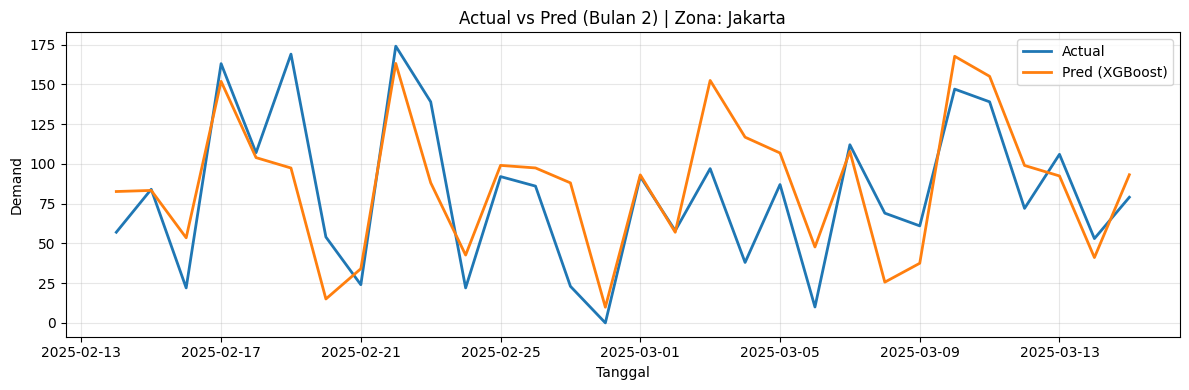

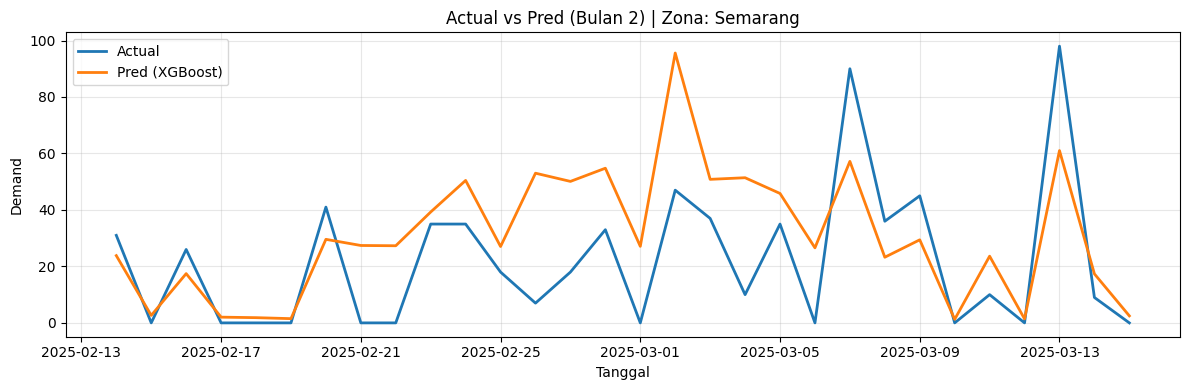

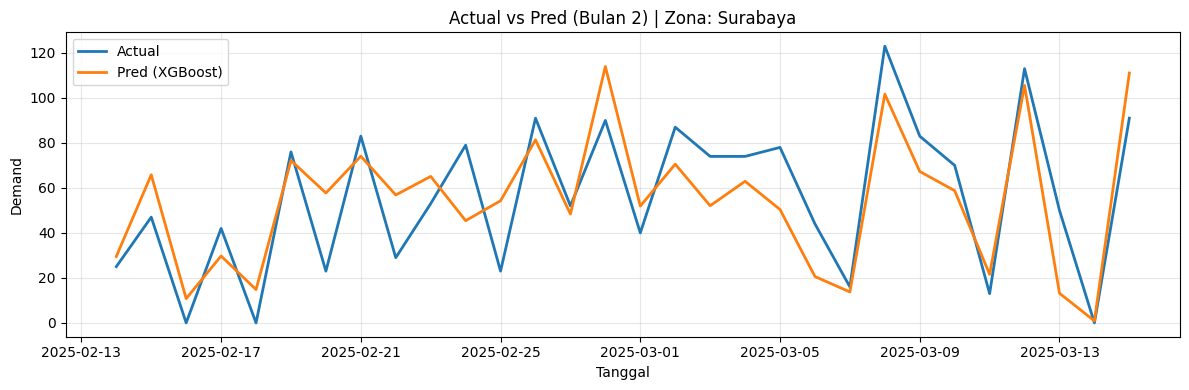

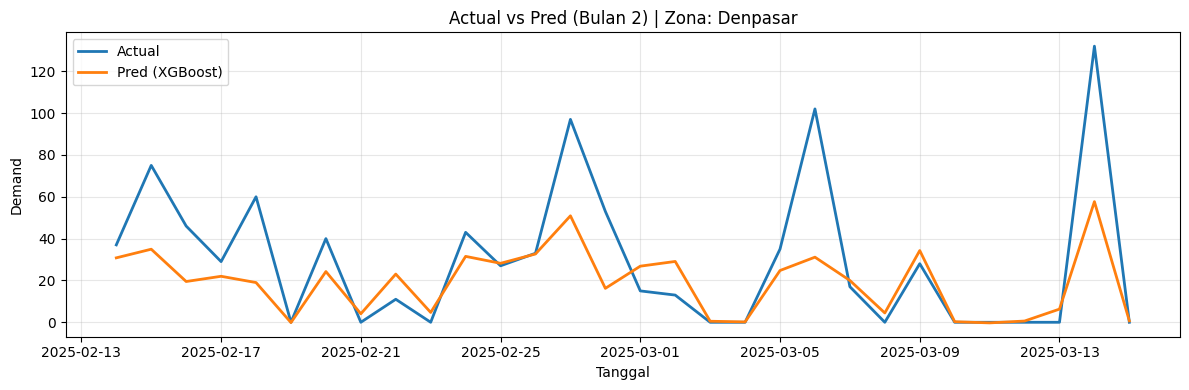

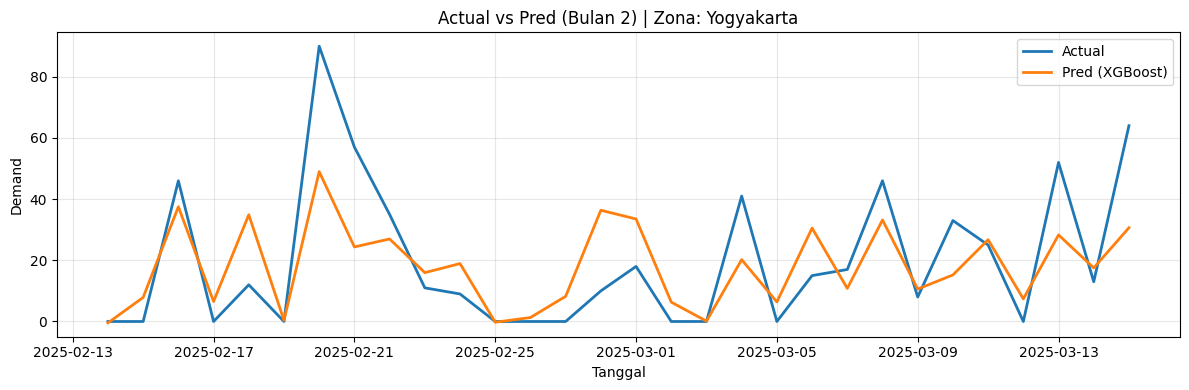

In [ ]:
# Plot Actual vs Pred untuk SEMUA zona (loop)
def plot_all_zones(zone_pred_df):
    zones = zone_pred_df["zona"].unique()

    print(f"Total zona: {len(zones)}")
    for z in zones:
        d = zone_pred_df[zone_pred_df["zona"] == z].sort_values("tanggal")

        if len(d) == 0:
            print(f"[SKIP] {z} (data kosong)")
            continue

        plt.figure(figsize=(12,4))
        plt.plot(d["tanggal"], d["actual"], label="Actual", linewidth=2)
        plt.plot(d["tanggal"], d["pred"], label="Pred (XGBoost)", linewidth=2)
        plt.title(f"Actual vs Pred (Bulan 2) | Zona: {z}")
        plt.xlabel("Tanggal")
        plt.ylabel("Demand")
        plt.grid(alpha=0.3)
        plt.legend()
        plt.tight_layout()
        plt.show()

# panggil
plot_all_zones(zone_pred_df)


## Forecasting Trips dan Demands

In [ ]:
# =========================================
# 7) FROM FORECAST → REQUIRED TRIPS (buat input optimasi)
#    Untuk testing awal: pakai pred bulan-2 (yang kita punya), agregasi per zona.
# =========================================
monthly_need = (
    zone_pred_df.groupby("zona", as_index=False)
    .agg(pred_demand=("pred", "sum"), actual_demand=("actual", "sum"))
)

monthly_need["required_trips_pred"] = np.ceil(monthly_need["pred_demand"] / cfg.capacity_per_trip).astype(int)
monthly_need["required_trips_actual"] = np.ceil(monthly_need["actual_demand"] / cfg.capacity_per_trip).astype(int)

monthly_need = monthly_need.sort_values("required_trips_pred", ascending=False).reset_index(drop=True)
monthly_need


,zona,pred_demand,actual_demand,required_trips_pred,required_trips_actual
0,Jakarta,2603.016602,2436.0,22,21
1,Surabaya,1622.303711,1669.0,14,14
2,Semarang,922.656067,661.0,8,6
3,Denpasar,578.020203,893.0,5,8
4,Yogyakarta,545.121826,602.0,5,6


In [ ]:
# =========================================
# COST MATRIX (PROXY dulu)
#    Kalau nanti ada kolom cost/time actual, tinggal ganti modelnya.
# =========================================
zone_cost_ref = (
    zone_daily.groupby("zona", as_index=False)
    .agg(zone_distance=("avg_distance","mean"),
         zone_traffic=("avg_traffic","mean"))
)

zone_cost_ref["zone_traffic"] = zone_cost_ref["zone_traffic"].fillna(zone_cost_ref["zone_traffic"].median()).fillna(0)

cost_per_km = 2500  # asumsi
zone_cost_ref["est_cost_zone"] = zone_cost_ref["zone_distance"] * (1 + 0.15*zone_cost_ref["zone_traffic"]) * cost_per_km

zone_to_cost = dict(zip(zone_cost_ref["zona"], zone_cost_ref["est_cost_zone"]))



In [ ]:
# =========================================
# 9) ASSIGNMENT SOLVER (3 kasus)
#    - demand > armada  : batching heuristic
#    - demand = armada  : hungarian normal
#    - armada > demand  : tambah dummy IDLE
# =========================================
from scipy.optimize import linear_sum_assignment
from typing import List

def build_trip_slots(monthly_need_df: pd.DataFrame, trip_col: str) -> List[str]:
    slots = []
    for _, r in monthly_need_df.iterrows():
        k = int(r[trip_col])
        for i in range(1, k+1):
            slots.append(f"{r['zona']}__{i}")
    return slots

def slot_zone(slot: str) -> str:
    return slot.split("__")[0]

def slot_cost(slot: str) -> float:
    return float(zone_to_cost.get(slot_zone(slot), 9e15))


def solve_assignment(armadas: List[str], tasks: List[str]) -> pd.DataFrame:
    nA, nT = len(armadas), len(tasks)

    # CASE A: demand > armada -> batching
    if nT > nA:
        remaining = tasks.copy()
        rows = []
        batch = 1

        while remaining:
            current = remaining[:nA]
            remaining = remaining[nA:]

            C = np.zeros((nA, len(current)))
            for i,a in enumerate(armadas):
                for j,t in enumerate(current):
                    C[i,j] = slot_cost(t)

            r, c = linear_sum_assignment(C)
            for ri, ci in zip(r, c):
                rows.append({
                    "batch": batch,
                    "armada": armadas[ri],
                    "task": current[ci],
                    "zona": slot_zone(current[ci]),
                    "cost": float(C[ri,ci]),
                    "status": "assigned"
                })
            batch += 1

        return pd.DataFrame(rows)

    # CASE B: demand = armada -> normal hungarian
    if nT == nA:
        C = np.zeros((nA, nT))
        for i,a in enumerate(armadas):
            for j,t in enumerate(tasks):
                C[i,j] = slot_cost(t)

        r, c = linear_sum_assignment(C)
        rows = []
        for ri, ci in zip(r, c):
            rows.append({
                "batch": 1,
                "armada": armadas[ri],
                "task": tasks[ci],
                "zona": slot_zone(tasks[ci]),
                "cost": float(C[ri,ci]),
                "status": "assigned"
            })
        return pd.DataFrame(rows)

    # CASE C: armada > demand -> add dummy IDLE
    dummy_n = nA - nT
    tasks_ext = tasks + [f"IDLE__{i}" for i in range(1, dummy_n+1)]

    C = np.zeros((nA, len(tasks_ext)))
    for i,a in enumerate(armadas):
        for j,t in enumerate(tasks_ext):
            C[i,j] = 0.0 if t.startswith("IDLE__") else slot_cost(t)

    r, c = linear_sum_assignment(C)
    rows = []
    for ri, ci in zip(r, c):
        t = tasks_ext[ci]
        if t.startswith("IDLE__"):
            rows.append({"batch": 1, "armada": armadas[ri], "task": t, "zona": "-", "cost": 0.0, "status": "idle"})
        else:
            rows.append({"batch": 1, "armada": armadas[ri], "task": t, "zona": slot_zone(t), "cost": float(C[ri,ci]), "status": "assigned"})
    return pd.DataFrame(rows)

In [ ]:
# =========================================
# RUN OPTIMASI (pakai required_trips_pred sebagai demand)
# =========================================
armadas = [f"A{i}" for i in range(1, cfg.fleet_size+1)]
trip_slots_pred = build_trip_slots(monthly_need, "required_trips_pred")

assign_df = solve_assignment(armadas, trip_slots_pred)
assign_df.head(), assign_df["batch"].max(), assign_df["status"].value_counts()


(   batch armada        task     zona           cost    status
 0      1     A1  Jakarta__1  Jakarta  495429.064805  assigned
 1      1     A2  Jakarta__2  Jakarta  495429.064805  assigned
 2      1     A3  Jakarta__3  Jakarta  495429.064805  assigned
 3      1     A4  Jakarta__4  Jakarta  495429.064805  assigned
 4      1     A5  Jakarta__5  Jakarta  495429.064805  assigned,
 5,
 status
 assigned    54
 Name: count, dtype: int64)

## DSS Policy + Cost Fn + Solver 3-Case

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import linear_sum_assignment

# ----------------------------
# 11A) Input function (policy)
# ----------------------------
def make_policy(
    strategy_overflow="outsourcing",   # "lost" | "outsourcing" | "split"
    outsource_ratio=0.5,               # proporsi task overflow yang dialihkan ke mitra
    lost_penalty=2_000_000,            # biaya opportunity loss per task hilang
    outsource_fee=300_000,             # biaya per task outsource
    idle_penalty=0                     # biaya idle (opsional)
):
    return {
        "strategy_overflow": strategy_overflow,
        "outsource_ratio": float(outsource_ratio),
        "lost_penalty": float(lost_penalty),
        "outsource_fee": float(outsource_fee),
        "idle_penalty": float(idle_penalty),
    }


# ----------------------------------------
# 11B) Armada profile (optional tapi bagus)
#   -> biar "armada cocok medan" masuk akal
# ----------------------------------------
def make_armada_profile(armadas):
    rows = []
    for a in armadas:
        # contoh rule simpel: A1-A6 truk_kecil, sisanya truk_besar
        idx = int(a.replace("A",""))
        if idx <= 6:
            rows.append({"armada": a, "type": "truk_kecil", "cost_mult": 0.95, "max_dist": 600})
        else:
            rows.append({"armada": a, "type": "truk_besar", "cost_mult": 1.10, "max_dist": 1500})
    return pd.DataFrame(rows)


# --------------------------------------------------------
# 11C) Cost function: cost = base_zone_cost * armada_mult
#     + penalti jika zona terlalu jauh untuk armada tsb
# --------------------------------------------------------
def build_cost_fn(zone_cost_ref, armada_profile_df):
    zone_to_cost = dict(zip(zone_cost_ref["zona"], zone_cost_ref["est_cost_zone"]))
    zone_to_dist = dict(zip(zone_cost_ref["zona"], zone_cost_ref["zone_distance"]))
    arm_map = armada_profile_df.set_index("armada").to_dict(orient="index")

    def cost_fn(armada, task):
        zona = task.split("__")[0]
        base = float(zone_to_cost.get(zona, 9e15))
        dist = float(zone_to_dist.get(zona, 9999))

        prof = arm_map[armada]
        cost = base * prof["cost_mult"]

        # penalti mismatch medan/jarak
        if dist > prof["max_dist"]:
            cost *= 1.6  # lu bisa tune jadi 1.3/2.0 sesuai narasi

        return cost

    return cost_fn


# -----------------------------------------
# 11D) Helper: bikin task list trip slots
# -----------------------------------------
def build_trip_slots_from_dict(task_dict):
    """
    task_dict = {"Jakarta": 5, "Surabaya": 2, ...}
    output: ["Jakarta__1","Jakarta__2",...]
    """
    slots = []
    for zona, k in task_dict.items():
        for i in range(1, int(k)+1):
            slots.append(f"{zona}__{i}")
    return slots


# -----------------------------------------
# 11E) DSS Solver (3 case + policy overflow)
# -----------------------------------------
def solve_assignment_dss(armadas, tasks, cost_fn, policy):
    """
    output:
      - assign_df: mapping armada->task (assigned/idle)
      - summary: ringkasan backlog, outsource, lost, total_cost
      - overflow_detail: list outsourced/lost tasks
    """
    armadas = list(armadas)
    tasks = list(tasks)

    nA = len(armadas)
    nT = len(tasks)

    outsourced, lost = [], []

    # CASE 1: demand > armada -> overflow handling
    if nT > nA:
        overflow = nT - nA

        if policy["strategy_overflow"] in ["outsourcing", "split"]:
            take = int(np.ceil(overflow * policy["outsource_ratio"]))
            take = min(take, overflow)

            # yang dialihkan ke mitra ambil dari belakang list
            outsourced = tasks[-take:]
            tasks = tasks[:-take]
        else:
            # lost demand
            lost = tasks[-overflow:]
            tasks = tasks[:-overflow]

    # update counts setelah overflow
    nT2 = len(tasks)

    # CASE 3: armada > demand -> tambah dummy IDLE
    if nA > nT2:
        dummy = [f"IDLE__{i}" for i in range(1, (nA-nT2)+1)]
        tasks_ext = tasks + dummy
    else:
        tasks_ext = tasks

    # Build cost matrix
    C = np.zeros((nA, len(tasks_ext)))
    for i, a in enumerate(armadas):
        for j, t in enumerate(tasks_ext):
            if t.startswith("IDLE__"):
                C[i, j] = policy["idle_penalty"]
            else:
                C[i, j] = cost_fn(a, t)

    r, c = linear_sum_assignment(C)

    rows = []
    for ri, ci in zip(r, c):
        a = armadas[ri]
        t = tasks_ext[ci]
        if t.startswith("IDLE__"):
            rows.append({"batch": 1, "armada": a, "task": t, "zona": "-", "status": "idle", "cost": float(C[ri,ci])})
        else:
            zona = t.split("__")[0]
            rows.append({"batch": 1, "armada": a, "task": t, "zona": zona, "status": "assigned", "cost": float(C[ri,ci])})

    assign_df = pd.DataFrame(rows)

    # Summary cost
    assign_cost = float(assign_df["cost"].sum())
    outsource_cost = len(outsourced) * policy["outsource_fee"]
    lost_cost = len(lost) * policy["lost_penalty"]
    total_cost = assign_cost + outsource_cost + lost_cost

    summary = {
        "armada_count": nA,
        "task_total": nT,
        "assigned": int((assign_df["status"]=="assigned").sum()),
        "idle": int((assign_df["status"]=="idle").sum()),
        "outsourced": len(outsourced),
        "lost": len(lost),
        "assign_cost": assign_cost,
        "outsourcing_cost": float(outsource_cost),
        "lost_cost": float(lost_cost),
        "total_cost": float(total_cost),
        "overflow_strategy": policy["strategy_overflow"]
    }

    overflow_detail = {"outsourced_tasks": outsourced, "lost_tasks": lost}
    return assign_df, summary, overflow_detail


## Decision-ready

In [ ]:
def add_reason(assign_df, zone_cost_ref, armada_profile_df, policy):
    # ranking zona by cost (buat narasi)
    zone_rank = zone_cost_ref[["zona","est_cost_zone"]].sort_values("est_cost_zone").reset_index(drop=True)
    zone_rank["rank_cost"] = np.arange(1, len(zone_rank)+1)

    cheapest_zone = zone_rank.iloc[0]["zona"]
    cheapest_cost = float(zone_rank.iloc[0]["est_cost_zone"])

    # join ke assignment
    out = assign_df.merge(zone_rank, on="zona", how="left")
    arm_map = armada_profile_df.set_index("armada").to_dict(orient="index")
    zone_to_dist = dict(zip(zone_cost_ref["zona"], zone_cost_ref["zone_distance"]))

    def build_reason(row):
        a = row["armada"]
        prof = arm_map.get(a, {"type":"-", "max_dist": None})

        if row["status"] == "idle":
            return (
                f"{a} idle karena demand(trips) lebih kecil dari armada. "
                f"Keputusan ini menjaga biaya operasional agar tidak boncos (tidak memaksa trip yang tidak perlu)."
            )

        zona = row["zona"]
        dist = zone_to_dist.get(zona, None)
        mismatch = ""
        if dist is not None and prof.get("max_dist") is not None and dist > prof["max_dist"]:
            mismatch = " (catatan: jarak zona melewati batas optimal armada, jadi ada penalti kecocokan)"

        return (
            f"{a} ({prof['type']}) → {zona} dipilih karena biaya zona relatif kompetitif "
            f"(rank {int(row['rank_cost'])}/{len(zone_rank)}) dan penugasan meminimalkan total cost.{mismatch} "
            f"Zona termurah umum: {cheapest_zone} (~{cheapest_cost:,.0f}), tapi DSS tetap sebar assignment "
            f"sesuai kebutuhan trip per zona."
        )

    out["alasan"] = out.apply(build_reason, axis=1)
    out = out.sort_values(["batch","armada"]).reset_index(drop=True)
    return out


## DEMO 3 CASE

In [ ]:
import inspect

def make_policy_flexible(**kwargs):
    """
    Panggil make_policy() tapi:
    - keyword yang ga dikenal DIABAIKAN (biar ga TypeError)
    - kalau policy object punya attribute yang sama, kita set juga
    - kalau policy dict, kita set key-nya
    """
    sig = inspect.signature(make_policy)
    valid = {k: v for k, v in kwargs.items() if k in sig.parameters}

    policy = make_policy(**valid)

    # set extra fields (kalau policy support)
    extras = {k: v for k, v in kwargs.items() if k not in valid}
    for k, v in extras.items():
        if isinstance(policy, dict):
            policy[k] = v
        else:
            if hasattr(policy, k):
                setattr(policy, k, v)

    return policy


## **DEMO 3 CASE**

In [ ]:
import inspect
import numpy as np
import pandas as pd

In [ ]:
# -------------------------
# 1) helper: cek UNTRACKED
# -------------------------
def check_untracked(tasks, assign_df, overflow):
    tasks = list(tasks)
    overflow = overflow or {}

    assigned = set()
    if assign_df is not None and len(assign_df) > 0 and "task" in assign_df.columns and "status" in assign_df.columns:
        assigned = set(assign_df.loc[assign_df["status"]=="assigned", "task"].tolist())

    outs = set(overflow.get("outsourced_tasks", []) or [])
    lost = set(overflow.get("lost_tasks", []) or [])

    untracked = [t for t in tasks if (t not in assigned and t not in outs and t not in lost)]
    return untracked


# -------------------------
# 2) PATCHED SOLVER: anti "task menguap"
# -------------------------
def solve_assignment_dss_patched(armadas, tasks, cost_fn, policy):
    """
    Wrapper untuk solve_assignment_dss() versi lama.
    Kalau solver lama ngeluarin UNTRACKED, kita masukin ke outsource/lost sesuai policy.

    Output:
    - assign_df: tabel assignment internal (assigned/idle)
    - summary: cost & jumlah (konsisten)
    - overflow: {outsourced_tasks, lost_tasks}
    """
    # panggil solver lama lu
    assign_df, summary, overflow = solve_assignment_dss(armadas, tasks, cost_fn, policy)

    # normalisasi overflow structure
    if overflow is None:
        overflow = {}
    overflow.setdefault("outsourced_tasks", [])
    overflow.setdefault("lost_tasks", [])

    # cari yang hilang
    untracked = check_untracked(tasks, assign_df, overflow)

    if len(untracked) > 0:
        strategy = policy.get("strategy_overflow", "outsourcing")
        ratio = float(policy.get("outsource_ratio", 1.0))

        if strategy == "outsourcing":
            overflow["outsourced_tasks"].extend(untracked)

        elif strategy == "lost":
            overflow["lost_tasks"].extend(untracked)

        elif strategy == "split":
            # sisanya = untracked
            # outsource sebagian sesuai ratio, sisanya lost
            k = int(np.ceil(ratio * len(untracked)))
            overflow["outsourced_tasks"].extend(untracked[:k])
            overflow["lost_tasks"].extend(untracked[k:])
        else:
            overflow["outsourced_tasks"].extend(untracked)

    # --- hitung ulang summary biar konsisten ---
    nA = len(armadas)
    nT = len(tasks)

    assigned_count = 0
    idle_count = 0
    assign_cost = 0.0

    if assign_df is not None and len(assign_df) > 0:
        if "status" in assign_df.columns:
            assigned_count = int((assign_df["status"]=="assigned").sum())
            idle_count = int((assign_df["status"]=="idle").sum())
        if "cost" in assign_df.columns and "status" in assign_df.columns:
            assign_cost = float(assign_df.loc[assign_df["status"]=="assigned", "cost"].sum())

    outs_count = len(overflow.get("outsourced_tasks", []) or [])
    lost_count = len(overflow.get("lost_tasks", []) or [])

    outsourcing_cost = float(outs_count * policy.get("outsourcing_cost_per_task", 300_000))
    lost_cost = float(lost_count * policy.get("lost_penalty_per_task", 500_000))
    total_cost = assign_cost + outsourcing_cost + lost_cost

    summary_fixed = {
        "armada_count": nA,
        "task_total": nT,
        "assigned": assigned_count,
        "idle": idle_count,
        "outsourced": outs_count,
        "lost": lost_count,
        "assign_cost": assign_cost,
        "outsourcing_cost": outsourcing_cost,
        "lost_cost": lost_cost,
        "total_cost": total_cost,
        "overflow_strategy": policy.get("strategy_overflow", "-")
    }

    return assign_df, summary_fixed, overflow

In [ ]:
def summarize_by_zone(tasks, assign_df, overflow):
    def zone_of(t):
        return t.split("__")[0] if "__" in str(t) else str(t)

    internal = pd.Series([zone_of(t) for t in assign_df.loc[assign_df["status"]=="assigned","task"]]).value_counts() \
              if (assign_df is not None and len(assign_df)>0) else pd.Series(dtype=int)

    outs = pd.Series([zone_of(t) for t in (overflow.get("outsourced_tasks", []) or [])]).value_counts()
    lost = pd.Series([zone_of(t) for t in (overflow.get("lost_tasks", []) or [])]).value_counts()

    zones = sorted(set(zone_of(t) for t in tasks))
    out = []
    for z in zones:
        out.append({
            "zona": z,
            "internal_assigned": int(internal.get(z, 0)),
            "outsourced": int(outs.get(z, 0)),
            "lost": int(lost.get(z, 0)),
            "total_task": sum(zone_of(t)==z for t in tasks)
        })
    return pd.DataFrame(out)


def show_case(title, tasks, assign_df, summary, overflow):
    print("\n" + "="*70)
    print(title)
    print("Summary:", summary)

    # cek untracked harus 0
    untracked = check_untracked(tasks, assign_df, overflow)
    print("UNTRACKED:", len(untracked))
    if untracked:
        print("Contoh UNTRACKED:", untracked[:10])

    print("\nRekap per zona (internal vs outsource vs lost):")
    display(summarize_by_zone(tasks, assign_df, overflow))

    if assign_df is not None and len(assign_df) > 0:
        print("\nContoh assignment internal (head 15):")
        display(assign_df.head(15))

In [ ]:
# CASE 1: demand > armada
task_dict_many = {"Jakarta": 12, "Surabaya": 6, "Semarang": 4}  # total 22 > 11
tasks_many = build_trip_slots_from_dict(task_dict_many)

# 1A) outsource 100% overflow
policy_1A = make_policy_flexible(
    strategy_overflow="outsourcing",
    outsource_ratio=1.0,
    outsourcing_cost_per_task=300_000,
    lost_penalty_per_task=0
)

assign1A, summary1A, overflow1A = solve_assignment_dss_patched(armadas, tasks_many, cost_fn, policy_1A)
assign1A = add_reason(assign1A, zone_cost_ref, armada_profile, policy_1A)
show_case("CASE 1A (Demand > Armada | Overflow -> Outsourcing 100%)", tasks_many, assign1A, summary1A, overflow1A)

# 1B) split: outsource sebagian, sisanya LOST (same-day)
policy_1B = make_policy_flexible(
    strategy_overflow="split",
    outsource_ratio=0.5,
    outsourcing_cost_per_task=300_000,
    lost_penalty_per_task=500_000
)

assign1B, summary1B, overflow1B = solve_assignment_dss_patched(armadas, tasks_many, cost_fn, policy_1B)
assign1B = add_reason(assign1B, zone_cost_ref, armada_profile, policy_1B)
show_case("CASE 1B (Demand > Armada | Split -> Outsource sebagian + Lost sisanya)", tasks_many, assign1B, summary1B, overflow1B)



CASE 1A (Demand > Armada | Overflow -> Outsourcing 100%)
Summary: {'armada_count': 11, 'task_total': 22, 'assigned': 11, 'idle': 0, 'outsourced': 11, 'lost': 0, 'assign_cost': 5548805.525812424, 'outsourcing_cost': 3300000.0, 'lost_cost': 0.0, 'total_cost': 8848805.525812425, 'overflow_strategy': 'outsourcing'}
UNTRACKED: 0

Rekap per zona (internal vs outsource vs lost):


,zona,internal_assigned,outsourced,lost,total_task
0,Jakarta,11,1,0,12
1,Semarang,0,4,0,4
2,Surabaya,0,6,0,6



Contoh assignment internal (head 15):


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,Jakarta__1,Jakarta,assigned,470657.611564,495429.064805,1,A1 (truk_kecil) → Jakarta dipilih karena biaya...
1,1,A10,Jakarta__10,Jakarta,assigned,544971.971285,495429.064805,1,A10 (truk_besar) → Jakarta dipilih karena biay...
2,1,A11,Jakarta__11,Jakarta,assigned,544971.971285,495429.064805,1,A11 (truk_besar) → Jakarta dipilih karena biay...
3,1,A2,Jakarta__2,Jakarta,assigned,470657.611564,495429.064805,1,A2 (truk_kecil) → Jakarta dipilih karena biaya...
4,1,A3,Jakarta__3,Jakarta,assigned,470657.611564,495429.064805,1,A3 (truk_kecil) → Jakarta dipilih karena biaya...
5,1,A4,Jakarta__4,Jakarta,assigned,470657.611564,495429.064805,1,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Jakarta__5,Jakarta,assigned,470657.611564,495429.064805,1,A5 (truk_kecil) → Jakarta dipilih karena biaya...
7,1,A6,Jakarta__6,Jakarta,assigned,470657.611564,495429.064805,1,A6 (truk_kecil) → Jakarta dipilih karena biaya...
8,1,A7,Jakarta__7,Jakarta,assigned,544971.971285,495429.064805,1,A7 (truk_besar) → Jakarta dipilih karena biaya...
9,1,A8,Jakarta__8,Jakarta,assigned,544971.971285,495429.064805,1,A8 (truk_besar) → Jakarta dipilih karena biaya...



CASE 1B (Demand > Armada | Split -> Outsource sebagian + Lost sisanya)
Summary: {'armada_count': 11, 'task_total': 22, 'assigned': 11, 'idle': 0, 'outsourced': 9, 'lost': 2, 'assign_cost': 5548805.525812424, 'outsourcing_cost': 2700000.0, 'lost_cost': 1000000.0, 'total_cost': 9248805.525812425, 'overflow_strategy': 'split'}
UNTRACKED: 0

Rekap per zona (internal vs outsource vs lost):


,zona,internal_assigned,outsourced,lost,total_task
0,Jakarta,11,1,0,12
1,Semarang,0,4,0,4
2,Surabaya,0,4,2,6



Contoh assignment internal (head 15):


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,Jakarta__1,Jakarta,assigned,470657.611564,495429.064805,1,A1 (truk_kecil) → Jakarta dipilih karena biaya...
1,1,A10,Jakarta__10,Jakarta,assigned,544971.971285,495429.064805,1,A10 (truk_besar) → Jakarta dipilih karena biay...
2,1,A11,Jakarta__11,Jakarta,assigned,544971.971285,495429.064805,1,A11 (truk_besar) → Jakarta dipilih karena biay...
3,1,A2,Jakarta__2,Jakarta,assigned,470657.611564,495429.064805,1,A2 (truk_kecil) → Jakarta dipilih karena biaya...
4,1,A3,Jakarta__3,Jakarta,assigned,470657.611564,495429.064805,1,A3 (truk_kecil) → Jakarta dipilih karena biaya...
5,1,A4,Jakarta__4,Jakarta,assigned,470657.611564,495429.064805,1,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Jakarta__5,Jakarta,assigned,470657.611564,495429.064805,1,A5 (truk_kecil) → Jakarta dipilih karena biaya...
7,1,A6,Jakarta__6,Jakarta,assigned,470657.611564,495429.064805,1,A6 (truk_kecil) → Jakarta dipilih karena biaya...
8,1,A7,Jakarta__7,Jakarta,assigned,544971.971285,495429.064805,1,A7 (truk_besar) → Jakarta dipilih karena biaya...
9,1,A8,Jakarta__8,Jakarta,assigned,544971.971285,495429.064805,1,A8 (truk_besar) → Jakarta dipilih karena biaya...


In [ ]:
# -------------------------
# CASE 2: demand = armada (PAS)
# Real-case: semua trip bisa ditangani armada internal,
# fokus ke minimasi cost & kecocokan armada-zona.
# -------------------------
task_dict_equal = {"Jakarta": 5, "Surabaya": 3, "Semarang": 3}  # total 11 = armada
tasks_equal = build_trip_slots_from_dict(task_dict_equal)

policy_2 = make_policy_flexible(strategy_overflow="lost")  # overflow ga relevan
assign2, summary2, overflow2 = solve_assignment_dss_patched(armadas, tasks_equal, cost_fn, policy_2)
assign2 = add_reason(assign2, zone_cost_ref, armada_profile, policy_2)
show_case("CASE 2 (Demand = Armada | Full internal optimal assignment)", tasks_equal, assign2, summary2, overflow2)






CASE 2 (Demand = Armada | Full internal optimal assignment)
Summary: {'armada_count': 11, 'task_total': 11, 'assigned': 11, 'idle': 0, 'outsourced': 0, 'lost': 0, 'assign_cost': 14997736.127570799, 'outsourcing_cost': 0.0, 'lost_cost': 0.0, 'total_cost': 14997736.127570799, 'overflow_strategy': 'lost'}
UNTRACKED: 0

Rekap per zona (internal vs outsource vs lost):


,zona,internal_assigned,outsourced,lost,total_task
0,Jakarta,5,0,0,5
1,Semarang,3,0,0,3
2,Surabaya,3,0,0,3



Contoh assignment internal (head 15):


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,Semarang__3,Semarang,assigned,1.367349e+06,1.439315e+06,3,A1 (truk_kecil) → Semarang dipilih karena biay...
1,1,A10,Surabaya__3,Surabaya,assigned,2.797924e+06,2.543567e+06,4,A10 (truk_besar) → Surabaya dipilih karena bia...
2,1,A11,Jakarta__1,Jakarta,assigned,5.449720e+05,4.954291e+05,1,A11 (truk_besar) → Jakarta dipilih karena biay...
3,1,A2,Jakarta__2,Jakarta,assigned,4.706576e+05,4.954291e+05,1,A2 (truk_kecil) → Jakarta dipilih karena biaya...
4,1,A3,Jakarta__3,Jakarta,assigned,4.706576e+05,4.954291e+05,1,A3 (truk_kecil) → Jakarta dipilih karena biaya...
5,1,A4,Jakarta__4,Jakarta,assigned,4.706576e+05,4.954291e+05,1,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Semarang__2,Semarang,assigned,1.367349e+06,1.439315e+06,3,A5 (truk_kecil) → Semarang dipilih karena biay...
7,1,A6,Semarang__1,Semarang,assigned,1.367349e+06,1.439315e+06,3,A6 (truk_kecil) → Semarang dipilih karena biay...
8,1,A7,Jakarta__5,Jakarta,assigned,5.449720e+05,4.954291e+05,1,A7 (truk_besar) → Jakarta dipilih karena biaya...
9,1,A8,Surabaya__1,Surabaya,assigned,2.797924e+06,2.543567e+06,4,A8 (truk_besar) → Surabaya dipilih karena biay...


In [ ]:
# -------------------------
# CASE 3: armada > demand (SURPLUS ARMADA)
# Real-case: ada armada idle → ini justru sehat (ngga dipaksakan jalan).
# Fokus: jangan boncos, pilih armada yang paling cocok untuk trip yang ada.
# -------------------------
task_dict_few = {"Jakarta": 3, "Surabaya": 2}  # total 5 < 11
tasks_few = build_trip_slots_from_dict(task_dict_few)

policy_3 = make_policy_flexible(strategy_overflow="lost")
assign3, summary3, overflow3 = solve_assignment_dss_patched(armadas, tasks_few, cost_fn, policy_3)
assign3 = add_reason(assign3, zone_cost_ref, armada_profile, policy_3)
show_case("CASE 3 (Armada > Demand | Some idle to avoid unnecessary cost)", tasks_few, assign3, summary3, overflow3)

print("\nIdle armada:", int((assign3["status"]=="idle").sum()))



CASE 3 (Armada > Demand | Some idle to avoid unnecessary cost)
Summary: {'armada_count': 11, 'task_total': 5, 'assigned': 5, 'idle': 6, 'outsourced': 0, 'lost': 0, 'assign_cost': 7007820.686097469, 'outsourcing_cost': 0.0, 'lost_cost': 0.0, 'total_cost': 7007820.686097469, 'overflow_strategy': 'lost'}
UNTRACKED: 0

Rekap per zona (internal vs outsource vs lost):


,zona,internal_assigned,outsourced,lost,total_task
0,Jakarta,3,0,0,3
1,Surabaya,2,0,0,2



Contoh assignment internal (head 15):


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,IDLE__1,-,idle,0.000000e+00,NaN,NaN,A1 idle karena demand(trips) lebih kecil dari ...
1,1,A10,Surabaya__1,Surabaya,assigned,2.797924e+06,2.543567e+06,4.0,A10 (truk_besar) → Surabaya dipilih karena bia...
2,1,A11,Surabaya__2,Surabaya,assigned,2.797924e+06,2.543567e+06,4.0,A11 (truk_besar) → Surabaya dipilih karena bia...
3,1,A2,IDLE__2,-,idle,0.000000e+00,NaN,NaN,A2 idle karena demand(trips) lebih kecil dari ...
4,1,A3,IDLE__3,-,idle,0.000000e+00,NaN,NaN,A3 idle karena demand(trips) lebih kecil dari ...
5,1,A4,Jakarta__1,Jakarta,assigned,4.706576e+05,4.954291e+05,1.0,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Jakarta__2,Jakarta,assigned,4.706576e+05,4.954291e+05,1.0,A5 (truk_kecil) → Jakarta dipilih karena biaya...
7,1,A6,Jakarta__3,Jakarta,assigned,4.706576e+05,4.954291e+05,1.0,A6 (truk_kecil) → Jakarta dipilih karena biaya...
8,1,A7,IDLE__6,-,idle,0.000000e+00,NaN,NaN,A7 idle karena demand(trips) lebih kecil dari ...
9,1,A8,IDLE__5,-,idle,0.000000e+00,NaN,NaN,A8 idle karena demand(trips) lebih kecil dari ...



Idle armada: 6


In [ ]:
# -------------------------
# CASE 1: demand > armada (OVERFLOW)
# Real-case: biasanya ada 3 opsi:
#   A) outsource semua overflow
#   B) split: sebagian outsource, sebagian reschedule (ditunda besok)
#   C) lost demand (kalau ga bisa dipenuhi)
# -------------------------
task_dict_many = {"Jakarta": 12, "Surabaya": 6, "Semarang": 4}  # total 22 > 11
tasks_many = build_trip_slots_from_dict(task_dict_many)

# 1A) Outsourcing 100% overflow (paling clean buat dijelasin)
policy_1A = make_policy_flexible(
    strategy_overflow="outsourcing",
    outsource_ratio=1.0,
    outsourcing_cost_per_task=300_000,  # optional: kalau policy punya field ini
    lost_penalty_per_task=0             # optional
)

assign1A, summary1A, overflow1A = solve_assignment_dss(armadas, tasks_many, cost_fn, policy_1A)
assign1A = add_reason(assign1A, zone_cost_ref, armada_profile, policy_1A)

show_case("CASE 1A (Demand > Armada | Overflow -> Outsourcing 100%)", assign1A, summary1A, overflow1A)


# 1B) Split realistis: outsource sebagian, sisanya LOST (bukan reschedule)
policy_1B = make_policy_flexible(
    strategy_overflow="split",
    outsource_ratio=0.5,                # 50% overflow outsource
    outsourcing_cost_per_task=300_000,  # optional
    lost_penalty_per_task=500_000       # optional: lost demand itu ada impact (komplain, refund, dll)
)

assign1B, summary1B, overflow1B = solve_assignment_dss(armadas, tasks_many, cost_fn, policy_1B)
assign1B = add_reason(assign1B, zone_cost_ref, armada_profile, policy_1B)

show_case("CASE 1B (Demand > Armada | Split -> Outsource sebagian + Lost sisanya)", assign1B, summary1B, overflow1B)

def check_untracked(tasks, assign_df, overflow):
    assigned = set(assign_df.loc[assign_df["status"]=="assigned", "task"].tolist()) if "task" in assign_df.columns else set()
    outs = set(overflow.get("outsourced_tasks", []))
    lost = set(overflow.get("lost_tasks", []))
    untracked = [t for t in tasks if (t not in assigned and t not in outs and t not in lost)]
    print("UNTRACKED:", len(untracked))
    if untracked:
        print(untracked[:20])

check_untracked(tasks_many, assign1A, overflow1A)
check_untracked(tasks_many, assign1B, overflow1B)



===== CASE 1A (Demand > Armada | Overflow -> Outsourcing 100%) =====
Summary: {'armada_count': 11, 'task_total': 22, 'assigned': 11, 'idle': 0, 'outsourced': 11, 'lost': 0, 'assign_cost': 5548805.525812424, 'outsourcing_cost': 3300000.0, 'lost_cost': 0.0, 'total_cost': 8848805.525812425, 'overflow_strategy': 'outsourcing'}
Overflow: outsourced=11 | lost=0


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,Jakarta__1,Jakarta,assigned,470657.611564,495429.064805,1,A1 (truk_kecil) → Jakarta dipilih karena biaya...
1,1,A10,Jakarta__10,Jakarta,assigned,544971.971285,495429.064805,1,A10 (truk_besar) → Jakarta dipilih karena biay...
2,1,A11,Jakarta__11,Jakarta,assigned,544971.971285,495429.064805,1,A11 (truk_besar) → Jakarta dipilih karena biay...
3,1,A2,Jakarta__2,Jakarta,assigned,470657.611564,495429.064805,1,A2 (truk_kecil) → Jakarta dipilih karena biaya...
4,1,A3,Jakarta__3,Jakarta,assigned,470657.611564,495429.064805,1,A3 (truk_kecil) → Jakarta dipilih karena biaya...
5,1,A4,Jakarta__4,Jakarta,assigned,470657.611564,495429.064805,1,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Jakarta__5,Jakarta,assigned,470657.611564,495429.064805,1,A5 (truk_kecil) → Jakarta dipilih karena biaya...
7,1,A6,Jakarta__6,Jakarta,assigned,470657.611564,495429.064805,1,A6 (truk_kecil) → Jakarta dipilih karena biaya...
8,1,A7,Jakarta__7,Jakarta,assigned,544971.971285,495429.064805,1,A7 (truk_besar) → Jakarta dipilih karena biaya...
9,1,A8,Jakarta__8,Jakarta,assigned,544971.971285,495429.064805,1,A8 (truk_besar) → Jakarta dipilih karena biaya...



Sebaran zona (assigned):


,zona,count
0,Jakarta,11



Total cost assigned: 5548805.525812424

===== CASE 1B (Demand > Armada | Split -> Outsource sebagian + Lost sisanya) =====
Summary: {'armada_count': 11, 'task_total': 22, 'assigned': 11, 'idle': 0, 'outsourced': 6, 'lost': 0, 'assign_cost': 5548805.525812424, 'outsourcing_cost': 1800000.0, 'lost_cost': 0.0, 'total_cost': 7348805.525812424, 'overflow_strategy': 'split'}
Overflow: outsourced=6 | lost=0


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,Jakarta__1,Jakarta,assigned,470657.611564,495429.064805,1,A1 (truk_kecil) → Jakarta dipilih karena biaya...
1,1,A10,Jakarta__10,Jakarta,assigned,544971.971285,495429.064805,1,A10 (truk_besar) → Jakarta dipilih karena biay...
2,1,A11,Jakarta__11,Jakarta,assigned,544971.971285,495429.064805,1,A11 (truk_besar) → Jakarta dipilih karena biay...
3,1,A2,Jakarta__2,Jakarta,assigned,470657.611564,495429.064805,1,A2 (truk_kecil) → Jakarta dipilih karena biaya...
4,1,A3,Jakarta__3,Jakarta,assigned,470657.611564,495429.064805,1,A3 (truk_kecil) → Jakarta dipilih karena biaya...
5,1,A4,Jakarta__4,Jakarta,assigned,470657.611564,495429.064805,1,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Jakarta__5,Jakarta,assigned,470657.611564,495429.064805,1,A5 (truk_kecil) → Jakarta dipilih karena biaya...
7,1,A6,Jakarta__6,Jakarta,assigned,470657.611564,495429.064805,1,A6 (truk_kecil) → Jakarta dipilih karena biaya...
8,1,A7,Jakarta__7,Jakarta,assigned,544971.971285,495429.064805,1,A7 (truk_besar) → Jakarta dipilih karena biaya...
9,1,A8,Jakarta__8,Jakarta,assigned,544971.971285,495429.064805,1,A8 (truk_besar) → Jakarta dipilih karena biaya...



Sebaran zona (assigned):


,zona,count
0,Jakarta,11



Total cost assigned: 5548805.525812424
UNTRACKED: 0
UNTRACKED: 5
['Jakarta__12', 'Surabaya__1', 'Surabaya__2', 'Surabaya__3', 'Surabaya__4']


In [ ]:
# -------------------------
# CASE 2: demand = armada (PAS)
# Real-case: semua trip bisa ditangani armada internal,
# fokus ke minimasi cost & kecocokan armada-zona.
# -------------------------
task_dict_equal = {"Jakarta": 5, "Surabaya": 3, "Semarang": 3}  # total 11 = armada
tasks_equal = build_trip_slots_from_dict(task_dict_equal)

policy_2 = make_policy_flexible(strategy_overflow="lost")  # overflow ga relevan
assign2, summary2, overflow2 = solve_assignment_dss(armadas, tasks_equal, cost_fn, policy_2)
assign2 = add_reason(assign2, zone_cost_ref, armada_profile, policy_2)

show_case("CASE 2 (Demand = Armada | Full internal optimal assignment)", assign2, summary2, overflow2)




===== CASE 2 (Demand = Armada | Full internal optimal assignment) =====
Summary: {'armada_count': 11, 'task_total': 11, 'assigned': 11, 'idle': 0, 'outsourced': 0, 'lost': 0, 'assign_cost': 14997736.127570799, 'outsourcing_cost': 0.0, 'lost_cost': 0.0, 'total_cost': 14997736.127570799, 'overflow_strategy': 'lost'}
Overflow: outsourced=0 | lost=0


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,Semarang__3,Semarang,assigned,1.367349e+06,1.439315e+06,3,A1 (truk_kecil) → Semarang dipilih karena biay...
1,1,A10,Surabaya__3,Surabaya,assigned,2.797924e+06,2.543567e+06,4,A10 (truk_besar) → Surabaya dipilih karena bia...
2,1,A11,Jakarta__1,Jakarta,assigned,5.449720e+05,4.954291e+05,1,A11 (truk_besar) → Jakarta dipilih karena biay...
3,1,A2,Jakarta__2,Jakarta,assigned,4.706576e+05,4.954291e+05,1,A2 (truk_kecil) → Jakarta dipilih karena biaya...
4,1,A3,Jakarta__3,Jakarta,assigned,4.706576e+05,4.954291e+05,1,A3 (truk_kecil) → Jakarta dipilih karena biaya...
5,1,A4,Jakarta__4,Jakarta,assigned,4.706576e+05,4.954291e+05,1,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Semarang__2,Semarang,assigned,1.367349e+06,1.439315e+06,3,A5 (truk_kecil) → Semarang dipilih karena biay...
7,1,A6,Semarang__1,Semarang,assigned,1.367349e+06,1.439315e+06,3,A6 (truk_kecil) → Semarang dipilih karena biay...
8,1,A7,Jakarta__5,Jakarta,assigned,5.449720e+05,4.954291e+05,1,A7 (truk_besar) → Jakarta dipilih karena biaya...
9,1,A8,Surabaya__1,Surabaya,assigned,2.797924e+06,2.543567e+06,4,A8 (truk_besar) → Surabaya dipilih karena biay...



Sebaran zona (assigned):


,zona,count
0,Jakarta,5
1,Semarang,3
2,Surabaya,3



Total cost assigned: 14997736.127570799


In [ ]:
# -------------------------
# CASE 3: armada > demand (SURPLUS ARMADA)
# Real-case: ada armada idle → ini justru sehat (ngga dipaksakan jalan).
# Fokus: jangan boncos, pilih armada yang paling cocok untuk trip yang ada.
# -------------------------
task_dict_few = {"Jakarta": 3, "Surabaya": 2}  # total 5 < 11
tasks_few = build_trip_slots_from_dict(task_dict_few)

policy_3 = make_policy_flexible(strategy_overflow="lost")
assign3, summary3, overflow3 = solve_assignment_dss(armadas, tasks_few, cost_fn, policy_3)
assign3 = add_reason(assign3, zone_cost_ref, armada_profile, policy_3)

show_case("CASE 3 (Armada > Demand | Some idle to avoid unnecessary cost)", assign3, summary3, overflow3)

print("Idle armada:", int((assign3["status"]=="idle").sum()))



===== CASE 3 (Armada > Demand | Some idle to avoid unnecessary cost) =====
Summary: {'armada_count': 11, 'task_total': 5, 'assigned': 5, 'idle': 6, 'outsourced': 0, 'lost': 0, 'assign_cost': 7007820.686097469, 'outsourcing_cost': 0.0, 'lost_cost': 0.0, 'total_cost': 7007820.686097469, 'overflow_strategy': 'lost'}
Overflow: outsourced=0 | lost=0


,batch,armada,task,zona,status,cost,est_cost_zone,rank_cost,alasan
0,1,A1,IDLE__1,-,idle,0.000000e+00,NaN,NaN,A1 idle karena demand(trips) lebih kecil dari ...
1,1,A10,Surabaya__1,Surabaya,assigned,2.797924e+06,2.543567e+06,4.0,A10 (truk_besar) → Surabaya dipilih karena bia...
2,1,A11,Surabaya__2,Surabaya,assigned,2.797924e+06,2.543567e+06,4.0,A11 (truk_besar) → Surabaya dipilih karena bia...
3,1,A2,IDLE__2,-,idle,0.000000e+00,NaN,NaN,A2 idle karena demand(trips) lebih kecil dari ...
4,1,A3,IDLE__3,-,idle,0.000000e+00,NaN,NaN,A3 idle karena demand(trips) lebih kecil dari ...
5,1,A4,Jakarta__1,Jakarta,assigned,4.706576e+05,4.954291e+05,1.0,A4 (truk_kecil) → Jakarta dipilih karena biaya...
6,1,A5,Jakarta__2,Jakarta,assigned,4.706576e+05,4.954291e+05,1.0,A5 (truk_kecil) → Jakarta dipilih karena biaya...
7,1,A6,Jakarta__3,Jakarta,assigned,4.706576e+05,4.954291e+05,1.0,A6 (truk_kecil) → Jakarta dipilih karena biaya...
8,1,A7,IDLE__6,-,idle,0.000000e+00,NaN,NaN,A7 idle karena demand(trips) lebih kecil dari ...
9,1,A8,IDLE__5,-,idle,0.000000e+00,NaN,NaN,A8 idle karena demand(trips) lebih kecil dari ...



Sebaran zona (assigned):


,zona,count
0,Jakarta,3
1,Surabaya,2



Total cost assigned: 7007820.686097469
Idle armada: 6


# **DEMO DSS**

## UTILS

In [ ]:
import pandas as pd
import numpy as np
import re
from difflib import get_close_matches

try:
    from IPython.display import display
except:
    display = print

In [ ]:
# -------------------------
# 0) INIT: semua armada READY
# -------------------------
def init_armada_status(armadas):
    return pd.DataFrame({"armada": armadas, "status": ["ready"] * len(armadas)})

def show_status(armada_status):
    armada_status = armada_status.sort_values("armada").reset_index(drop=True)
    print("\nStatus armada:")
    display(armada_status)
    print("Ready :", int((armada_status["status"]=="ready").sum()))
    print("OnTrip:", int((armada_status["status"]=="on_trip").sum()))

def set_armada_status(armada_status, armada, new_status):
    armada_status = armada_status.copy()
    armada_status.loc[armada_status["armada"] == armada, "status"] = new_status
    return armada_status


In [ ]:

# -------------------------
# 1) ZONE typo tolerant
# -------------------------
def normalize_text(s: str) -> str:
    s = s.lower().strip()
    s = re.sub(r"[^a-z\s]", "", s)
    s = re.sub(r"\s+", " ", s)
    return s

def resolve_zone(user_input: str, zona_list, cutoff=0.6):
    zona_list = list(zona_list)
    norm_to_real = {normalize_text(z): z for z in zona_list}
    user_norm = normalize_text(user_input)

    alias_map = {
        "jogja": "yogyakarta",
        "jogjakarta": "yogyakarta",
        "jogjakrta": "yogyakarta",
        "yogya": "yogyakarta",
        "jakarta": "jakarta",
        "jkt": "jakarta",
        "srabaya": "surabaya",
        "sby": "surabaya",
        "smg": "semarang",
        "dps": "denpasar",
    }

    # alias direct
    if user_norm in alias_map and alias_map[user_norm] in norm_to_real:
        real = norm_to_real[alias_map[user_norm]]
        return real, f"(auto-correct '{user_input}' → '{real}')"

    # exact normalize match
    if user_norm in norm_to_real:
        return norm_to_real[user_norm], ""

    # fuzzy typo match
    candidates = get_close_matches(user_norm, list(norm_to_real.keys()), n=1, cutoff=cutoff)
    if candidates:
        best = norm_to_real[candidates[0]]
        return best, f"(auto-correct '{user_input}' → '{best}')"

    return None, ""

In [ ]:
# -------------------------
# 2) input angka aman
# -------------------------
def ask_int(prompt, default=None, min_val=None):
    raw = input(prompt).strip()
    if raw == "" and default is not None:
        return default
    try:
        v = int(raw)
        if min_val is not None and v < min_val:
            print(f"[WARN] minimal {min_val}. diset jadi {min_val}.")
            return min_val
        return v
    except ValueError:
        print("[ERROR] harus angka. coba lagi.")
        return ask_int(prompt, default=default, min_val=min_val)


In [ ]:
# -------------------------
# 3) Commit + log
# -------------------------
def build_reason_from_rekom(chosen_armada, rekom_df):
    if rekom_df is None or len(rekom_df) == 0:
        return "Dipilih karena armada tersedia (ready)."

    if "armada" not in rekom_df.columns:
        return "Dipilih karena armada tersedia (ready)."

    row = rekom_df[rekom_df["armada"] == chosen_armada]
    if len(row) == 0:
        return "Dipilih karena armada tersedia (ready)."

    row = row.iloc[0].to_dict()
    # coba ambil kolom cost kalau ada
    if "est_cost" in row:
        return f"Dipilih karena estimasi biaya termasuk rendah (est_cost≈{row['est_cost']:,.0f})."
    if "cost" in row:
        return f"Dipilih karena estimasi biaya termasuk rendah (cost≈{row['cost']:,.0f})."
    return "Dipilih karena skor/biaya paling kompetitif di rekomendasi."

def choose_armada_from_rekom(armada_status, rekom_df):
    if rekom_df is None or len(rekom_df) == 0:
        print("[INFO] Tidak ada rekomendasi (mungkin semua armada sudah on_trip).")
        return None

    print("\nRekomendasi armada (READY):")
    display(rekom_df.reset_index(drop=True))

    chosen = input("Pilih armada (contoh A4) atau ENTER untuk batal: ").strip().upper()
    if chosen == "":
        print("[INFO] Batal.")
        return None

    if chosen not in armada_status["armada"].values:
        print("[ERROR] Armada tidak ditemukan.")
        return None

    st = armada_status.loc[armada_status["armada"] == chosen, "status"].values[0]
    if st != "ready":
        print(f"[ERROR] {chosen} tidak ready (status={st}).")
        return None

    return chosen



In [ ]:
# -------------------------
# 4) RUN DEMO (langsung input zona)
# -------------------------
def run_dss_demo_direct(zone_cost_ref, top_k=5, cutoff=0.6):
    # setup armada
    armadas = [f"A{i}" for i in range(1, 12)]
    armada_profile = make_armada_profile(armadas)
    armada_status  = init_armada_status(armadas)

    # log assignment
    assign_log = []
    trip_no = 1

    zona_list = sorted(zone_cost_ref["zona"].dropna().unique().tolist())

    print("=== DEMO DSS (DIRECT INPUT) ===")
    print("Ketik zona tujuan langsung. Shortcut:")
    print("- status  -> lihat status armada")
    print("- reset   -> balikin semua armada jadi ready")
    print("- finish A4 -> balikin armada A4 jadi ready (selesai trip)")
    print("- done    -> selesai demo\n")

    show_status(armada_status)
    print("\nZona tersedia:", ", ".join(zona_list))

    while True:
        raw = input("\nMasukkan zona_tujuan (atau status/reset/finish A4/done): ").strip()

        if raw.lower() == "done":
            print("=== DEMO SELESAI ===")
            break

        if raw.lower() == "status":
            show_status(armada_status)
            continue

        if raw.lower() == "reset":
            armada_status = init_armada_status(armadas)
            print("✅ Reset: semua armada READY.")
            show_status(armada_status)
            continue

        if raw.lower().startswith("finish"):
            parts = raw.split()
            if len(parts) != 2:
                print("[ERROR] Format finish salah. Contoh: finish A4")
                continue
            a = parts[1].upper()
            if a not in armada_status["armada"].values:
                print("[ERROR] Armada tidak ada.")
                continue
            armada_status = set_armada_status(armada_status, a, "ready")
            print(f"✅ {a} diset READY lagi.")
            show_status(armada_status)
            continue

        # --- zona input normal ---
        zona, note = resolve_zone(raw, zona_list, cutoff=cutoff)
        if zona is None:
            print(f"[ERROR] Zona '{raw}' tidak dikenali. (coba ketik lebih mirip)")
            continue
        if note:
            print(note)

        # kalau ready habis
        if int((armada_status["status"]=="ready").sum()) == 0:
            print("[WARN] Armada READY habis. Opsi: outsourcing / reschedule / lost demand (nanti bisa ditambah).")
            continue

        demand_kg    = ask_int("Masukkan demand_kg (default 900): ", default=900, min_val=1)
        deadline_hrs = ask_int("Masukkan deadline_hrs (default 10): ", default=10, min_val=1)

        # minta rekomendasi dari fungsi lu
        result = new_trip_request(
            zona_tujuan=zona,
            demand_kg=demand_kg,
            deadline_hrs=deadline_hrs,
            zone_cost_ref=zone_cost_ref,
            armada_profile=armada_profile,
            armada_status=armada_status,
            top_k=top_k
        )

        print("\n" + result.get("msg", "[INFO] OK"))
        rekom_df = result.get("rekomendasi", None)

        # safety: filter rekom biar cuma READY (kalau new_trip_request belum strict)
        if isinstance(rekom_df, pd.DataFrame) and "armada" in rekom_df.columns:
            ready_list = set(armada_status.loc[armada_status["status"]=="ready", "armada"].tolist())
            rekom_df = rekom_df[rekom_df["armada"].isin(ready_list)].copy()

        chosen = choose_armada_from_rekom(armada_status, rekom_df)
        if chosen is None:
            continue

        # commit
        armada_status = set_armada_status(armada_status, chosen, "on_trip")
        alasan = build_reason_from_rekom(chosen, rekom_df)

        assign_log.append({
            "trip_no": trip_no,
            "zona": zona,
            "demand_kg": demand_kg,
            "deadline_hrs": deadline_hrs,
            "armada": chosen,
            "status": "on_trip",
            "alasan": alasan
        })
        trip_no += 1

        print(f"\n✅ ASSIGNMENT FINAL: {chosen} -> {zona}")
        print("Alasan:", alasan)

        show_status(armada_status)

        # tampilkan log terbaru biar kelihatan assignment history
        log_df = pd.DataFrame(assign_log)
        print("\nRiwayat assignment (terbaru di bawah):")
        display(log_df.tail(10).reset_index(drop=True))

    return armada_status, pd.DataFrame(assign_log)



## RUNNER

In [ ]:
# =========================
# RUN
# =========================
final_status, assignment_history = run_dss_demo_direct(zone_cost_ref, top_k=5, cutoff=0.6)

=== DEMO DSS (DIRECT INPUT) ===
Ketik zona tujuan langsung. Shortcut:
- status  -> lihat status armada
- reset   -> balikin semua armada jadi ready
- finish A4 -> balikin armada A4 jadi ready (selesai trip)
- done    -> selesai demo


Status armada:


,armada,status
0,A1,ready
1,A10,ready
2,A11,ready
3,A2,ready
4,A3,ready
5,A4,ready
6,A5,ready
7,A6,ready
8,A7,ready
9,A8,ready


Ready : 11
OnTrip: 0

Zona tersedia: Denpasar, Jakarta, Semarang, Surabaya, Yogyakarta

Masukkan zona_tujuan (atau status/reset/finish A4/done): srabaya
(auto-correct 'srabaya' → 'Surabaya')
Masukkan demand_kg (default 900): 600
Masukkan deadline_hrs (default 10): 13

Trip baru ke Surabaya (demand=600kg, deadline=13 jam).

Rekomendasi armada (READY):


,armada,status,type,cap_kg,max_dist,est_cost,alasan
0,A7,ready,truk_besar,1500,1500,2.797924e+06,"status ready, tipe truk_besar, estimasi biaya ..."
1,A8,ready,truk_besar,1500,1500,2.797924e+06,"status ready, tipe truk_besar, estimasi biaya ..."
2,A10,ready,truk_besar,1500,1500,2.797924e+06,"status ready, tipe truk_besar, estimasi biaya ..."
3,A9,ready,truk_besar,1500,1500,2.797924e+06,"status ready, tipe truk_besar, estimasi biaya ..."
4,A11,ready,truk_besar,1500,1500,2.797924e+06,"status ready, tipe truk_besar, estimasi biaya ..."


Pilih armada (contoh A4) atau ENTER untuk batal: A9

✅ ASSIGNMENT FINAL: A9 -> Surabaya
Alasan: Dipilih karena estimasi biaya termasuk rendah (est_cost≈2,797,924).

Status armada:


,armada,status
0,A1,ready
1,A10,ready
2,A11,ready
3,A2,ready
4,A3,ready
5,A4,ready
6,A5,ready
7,A6,ready
8,A7,ready
9,A8,ready


Ready : 10
OnTrip: 1

Riwayat assignment (terbaru di bawah):


,trip_no,zona,demand_kg,deadline_hrs,armada,status,alasan
0,1,Surabaya,600,13,A9,on_trip,Dipilih karena estimasi biaya termasuk rendah ...



Masukkan zona_tujuan (atau status/reset/finish A4/done): jakarta
(auto-correct 'jakarta' → 'Jakarta')
Masukkan demand_kg (default 900): 1200
Masukkan deadline_hrs (default 10): 4

Trip baru ke Jakarta (demand=1200kg, deadline=4 jam).

Rekomendasi armada (READY):


,armada,status,type,cap_kg,max_dist,est_cost,alasan
0,A7,ready,truk_besar,1500,1500,5.449720e+05,"status ready, tipe truk_besar, estimasi biaya ..."
1,A8,ready,truk_besar,1500,1500,5.449720e+05,"status ready, tipe truk_besar, estimasi biaya ..."
2,A11,ready,truk_besar,1500,1500,5.449720e+05,"status ready, tipe truk_besar, estimasi biaya ..."
3,A10,ready,truk_besar,1500,1500,5.449720e+05,"status ready, tipe truk_besar, estimasi biaya ..."
4,A4,ready,truk_kecil,800,600,4.235919e+12,A4 tidak cocok: kapasitas 800kg < kebutuhan 12...


Pilih armada (contoh A4) atau ENTER untuk batal: A8

✅ ASSIGNMENT FINAL: A8 -> Jakarta
Alasan: Dipilih karena estimasi biaya termasuk rendah (est_cost≈544,972).

Status armada:


,armada,status
0,A1,ready
1,A10,ready
2,A11,ready
3,A2,ready
4,A3,ready
5,A4,ready
6,A5,ready
7,A6,ready
8,A7,ready
9,A8,on_trip


Ready : 9
OnTrip: 2

Riwayat assignment (terbaru di bawah):


,trip_no,zona,demand_kg,deadline_hrs,armada,status,alasan
0,1,Surabaya,600,13,A9,on_trip,Dipilih karena estimasi biaya termasuk rendah ...
1,2,Jakarta,1200,4,A8,on_trip,Dipilih karena estimasi biaya termasuk rendah ...



Masukkan zona_tujuan (atau status/reset/finish A4/done): status

Status armada:


,armada,status
0,A1,ready
1,A10,ready
2,A11,ready
3,A2,ready
4,A3,ready
5,A4,ready
6,A5,ready
7,A6,ready
8,A7,ready
9,A8,on_trip


Ready : 9
OnTrip: 2

Masukkan zona_tujuan (atau status/reset/finish A4/done): jakarta
(auto-correct 'jakarta' → 'Jakarta')
Masukkan demand_kg (default 900): 400
Masukkan deadline_hrs (default 10): 2

Trip baru ke Jakarta (demand=400kg, deadline=2 jam).

Rekomendasi armada (READY):


,armada,status,type,cap_kg,max_dist,est_cost,alasan
0,A1,ready,truk_kecil,800,600,470657.611564,"status ready, tipe truk_kecil, estimasi biaya ..."
1,A2,ready,truk_kecil,800,600,470657.611564,"status ready, tipe truk_kecil, estimasi biaya ..."
2,A3,ready,truk_kecil,800,600,470657.611564,"status ready, tipe truk_kecil, estimasi biaya ..."
3,A4,ready,truk_kecil,800,600,470657.611564,"status ready, tipe truk_kecil, estimasi biaya ..."
4,A5,ready,truk_kecil,800,600,470657.611564,"status ready, tipe truk_kecil, estimasi biaya ..."


Pilih armada (contoh A4) atau ENTER untuk batal: A5

✅ ASSIGNMENT FINAL: A5 -> Jakarta
Alasan: Dipilih karena estimasi biaya termasuk rendah (est_cost≈470,658).

Status armada:


,armada,status
0,A1,ready
1,A10,ready
2,A11,ready
3,A2,ready
4,A3,ready
5,A4,ready
6,A5,on_trip
7,A6,ready
8,A7,ready
9,A8,on_trip


Ready : 8
OnTrip: 3

Riwayat assignment (terbaru di bawah):


,trip_no,zona,demand_kg,deadline_hrs,armada,status,alasan
0,1,Surabaya,600,13,A9,on_trip,Dipilih karena estimasi biaya termasuk rendah ...
1,2,Jakarta,1200,4,A8,on_trip,Dipilih karena estimasi biaya termasuk rendah ...
2,3,Jakarta,400,2,A5,on_trip,Dipilih karena estimasi biaya termasuk rendah ...



Masukkan zona_tujuan (atau status/reset/finish A4/done): status

Status armada:


,armada,status
0,A1,ready
1,A10,ready
2,A11,ready
3,A2,ready
4,A3,ready
5,A4,ready
6,A5,on_trip
7,A6,ready
8,A7,ready
9,A8,on_trip


Ready : 8
OnTrip: 3

Masukkan zona_tujuan (atau status/reset/finish A4/done): finish A5
✅ A5 diset READY lagi.

Status armada:


,armada,status
0,A1,ready
1,A10,ready
2,A11,ready
3,A2,ready
4,A3,ready
5,A4,ready
6,A5,ready
7,A6,ready
8,A7,ready
9,A8,on_trip


Ready : 9
OnTrip: 2

Masukkan zona_tujuan (atau status/reset/finish A4/done): done
=== DEMO SELESAI ===
